# **Global imports** (run this before running anything else)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error;
from time import time


#  **Dataset 1: Infrared Thermography Temperature**

In [ ]:
 #using the official website of the dataset, we used the ucimlrep to import the dataset.
from ucimlrepo import fetch_ucirepo

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X_tempFeature = infrared_thermography_temperature.data.features
y_tempTarget = infrared_thermography_temperature.data.targets
#y_tempTarget = y_tempTarget.drop(columns=["aveOralF"])

#since our focus target is aveOralM, ignore aveOralF
y_tempTarget = y_tempTarget['aveOralM']


X_tempFeature = X_tempFeature.drop(columns= ["Gender"])
X_tempFeature = X_tempFeature.drop(columns= ["Ethnicity"])
X_tempFeature = X_tempFeature.drop(columns= ["Age"])



print("this is X_tempFeature")
print(X_tempFeature)
print(y_tempTarget)

# metadata
print(infrared_thermography_temperature.metadata)

# variable information
print(infrared_thermography_temperature.variables)

this is X_tempFeature
      T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  \
0      24.0      28.0       0.8     0.7025    35.0300    35.3775      34.4000   
1      24.0      26.0       0.8     0.7800    34.5500    34.5200      33.9300   
2      24.0      26.0       0.8     0.8625    35.6525    35.5175      34.2775   
3      24.0      27.0       0.8     0.9300    35.2225    35.6125      34.3850   
4      24.0      27.0       0.8     0.8950    35.5450    35.6650      34.9100   
...     ...       ...       ...        ...        ...        ...          ...   
1015   25.7      50.8       0.6     1.2225    35.6425    35.6525      34.8575   
1016   25.7      50.8       0.6     1.4675    35.9825    35.7575      35.4275   
1017   28.0      24.3       0.6     0.1300    36.4075    36.3400      35.8700   
1018   25.0      39.8       0.6     1.2450    35.8150    35.5250      34.2950   
1019   23.8      45.6       0.6     0.8675    35.7075    35.5825      34.8875   

     

In [ ]:
#Performing EDA (Exploratory Data Analysis)

#where X = temperature features, y = temperature targets

#inspect the first rows of the infrared thermography dataset
#using pandas head function
print(X_tempFeature.head())

print(55 * '-')
print("The information of the X: ")
#check information on how the dataset looks
#using pandas info function
print(X_tempFeature.info())

   T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  \
0   24.0      28.0       0.8     0.7025    35.0300    35.3775      34.4000   
1   24.0      26.0       0.8     0.7800    34.5500    34.5200      33.9300   
2   24.0      26.0       0.8     0.8625    35.6525    35.5175      34.2775   
3   24.0      27.0       0.8     0.9300    35.2225    35.6125      34.3850   
4   24.0      27.0       0.8     0.8950    35.5450    35.6650      34.9100   

   aveAllL13_1    T_RC1  T_RC_Dry1  ...  T_FHCC1  T_FHRC1  T_FHLC1  T_FHBC1  \
0      34.9175  34.9850    34.9850  ...  33.5775  33.4775  33.3725  33.4925   
1      34.2250  34.7100    34.6325  ...  34.0325  34.0550  33.6775  33.9700   
2      34.8000  35.6850    35.6675  ...  34.9000  34.8275  34.6475  34.8200   
3      35.2475  35.2075    35.2000  ...  34.4400  34.4225  34.6550  34.3025   
4      35.3675  35.6025    35.4750  ...  35.0900  35.1600  34.3975  34.6700   

   T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_O

In [ ]:
'''
# Check specifically which columns are numerical and which are catgorical

numerical_column1 = X_tempFeature.select_dtypes(include = ['int64', 'float64']).columns
categorical_column1 = X_tempFeature.select_dtypes(include = ['object']).columns

X_tempFeature = pd.get_dummies(X_tempFeature, columns = categorical_column1)

scaler1 = StandardScaler()
X_tempFeature[numerical_column1] = scaler1.fit_transform(X_tempFeature[numerical_column1])
'''

"\n# Check specifically which columns are numerical and which are catgorical\n\nnumerical_column1 = X_tempFeature.select_dtypes(include = ['int64', 'float64']).columns\ncategorical_column1 = X_tempFeature.select_dtypes(include = ['object']).columns\n\nX_tempFeature = pd.get_dummies(X_tempFeature, columns = categorical_column1)\n\nscaler1 = StandardScaler()\nX_tempFeature[numerical_column1] = scaler1.fit_transform(X_tempFeature[numerical_column1])\n"

In [ ]:
#removing nan values
X_tempFeature = X_tempFeature.drop(index=[902, 903])
y_tempTarget = y_tempTarget.drop(index=[902, 903])

0       0.8
1       0.8
2       0.8
3       0.8
4       0.8
       ... 
1015    0.6
1016    0.6
1017    0.6
1018    0.6
1019    0.6
Name: Distance, Length: 1018, dtype: float64


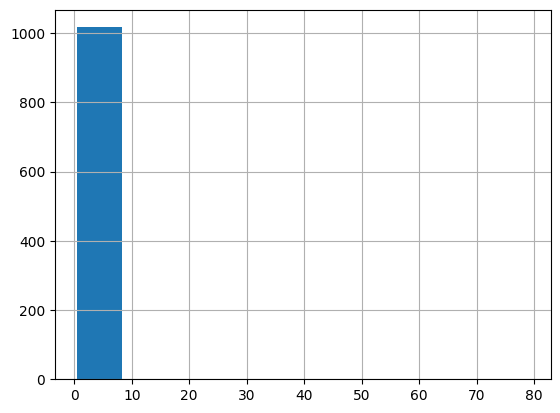

In [ ]:
print(X_tempFeature['Distance'])

X_tempFeature['Distance']

X_tempFeature.Distance.hist()

X_tempFeature[X_tempFeature['Distance'] > 2]
#from the plot we got and when checking if distance is >2, it seems really biased,
#this column could affect our models accuracies perhaps so just drop column 97


X_tempFeature = X_tempFeature.drop(index=97)
y_tempTarget = y_tempTarget.drop(index=97)


array([[<Axes: title={'center': 'T_atm'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'T_offset1'}>,
        <Axes: title={'center': 'Max1R13_1'}>],
       [<Axes: title={'center': 'Max1L13_1'}>,
        <Axes: title={'center': 'aveAllR13_1'}>,
        <Axes: title={'center': 'aveAllL13_1'}>,
        <Axes: title={'center': 'T_RC1'}>,
        <Axes: title={'center': 'T_RC_Dry1'}>],
       [<Axes: title={'center': 'T_RC_Wet1'}>,
        <Axes: title={'center': 'T_RC_Max1'}>,
        <Axes: title={'center': 'T_LC1'}>,
        <Axes: title={'center': 'T_LC_Dry1'}>,
        <Axes: title={'center': 'T_LC_Wet1'}>],
       [<Axes: title={'center': 'T_LC_Max1'}>,
        <Axes: title={'center': 'RCC1'}>,
        <Axes: title={'center': 'LCC1'}>,
        <Axes: title={'center': 'canthiMax1'}>,
        <Axes: title={'center': 'canthi4Max1'}>],
       [<Axes: title={'center': 'T_FHCC1'}>,
        <Axes: title={'cente

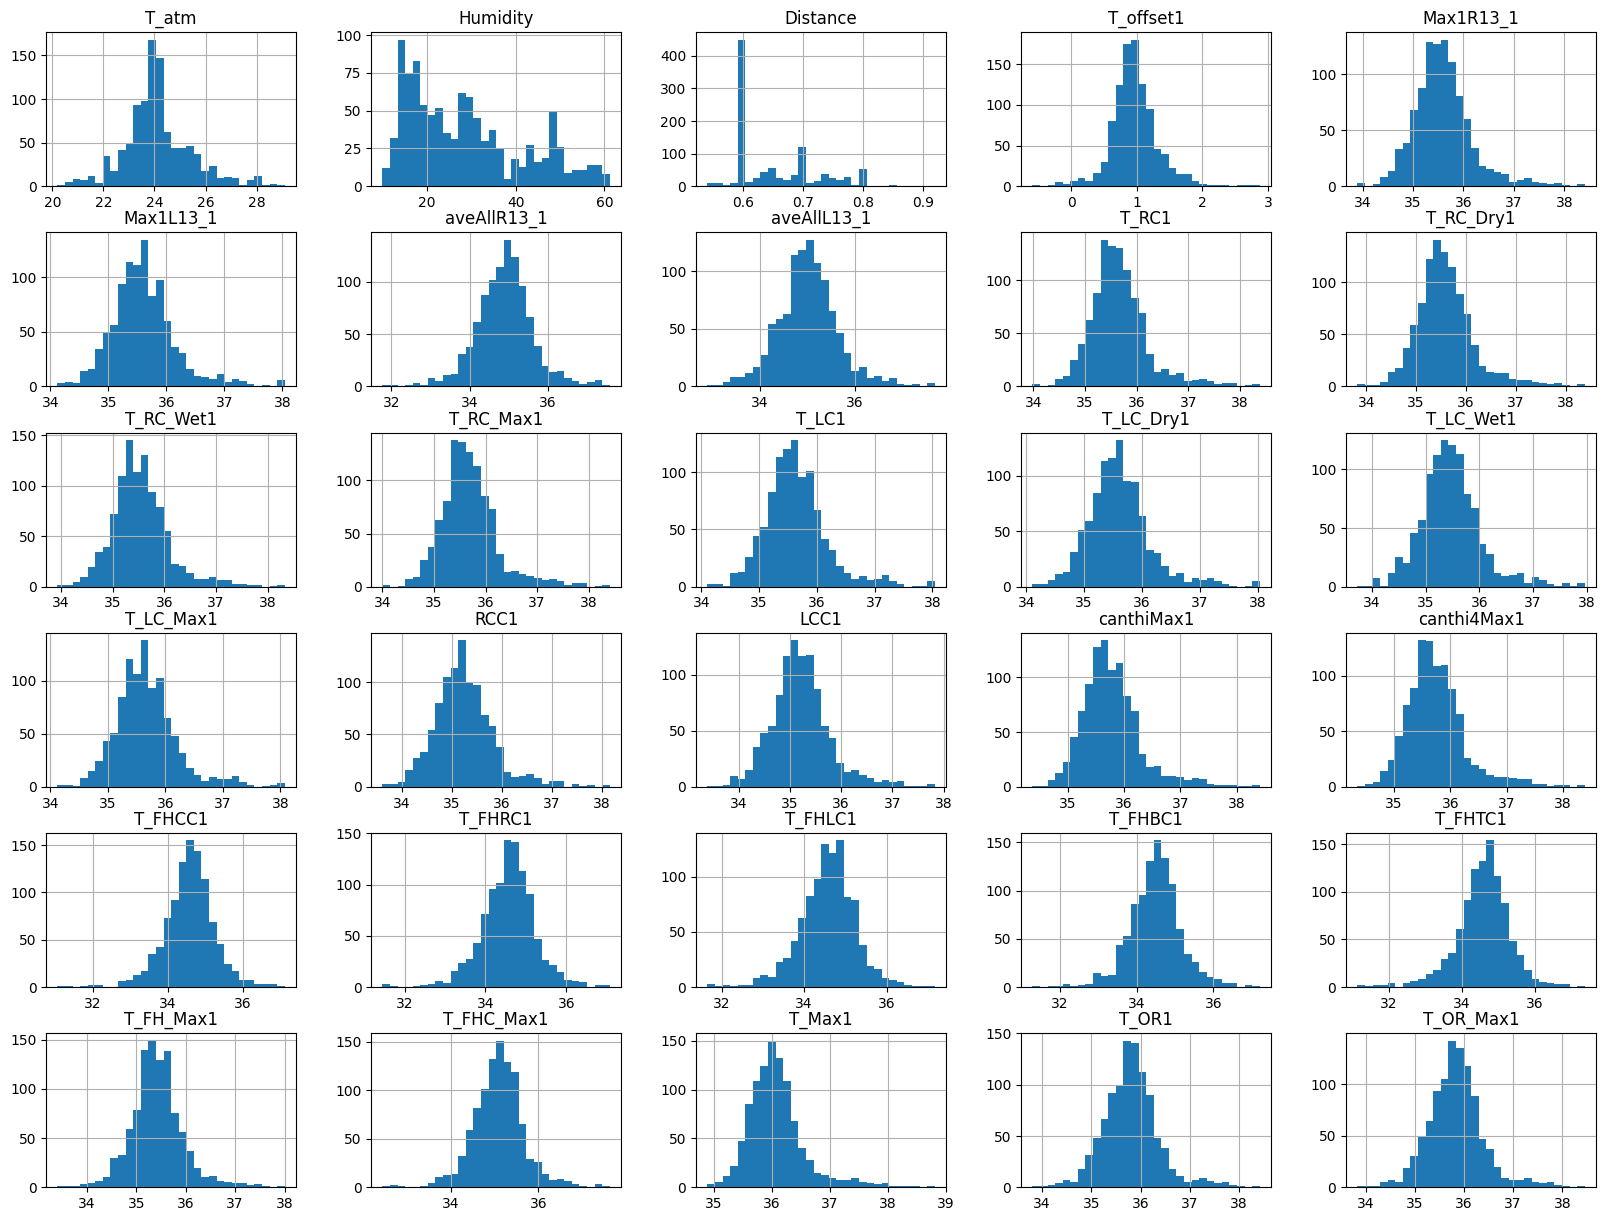

In [ ]:
#return the description of the data in the dataframe, this will give us some basic statistics of the data
#such as mean, standard deviation ... etc
X_tempFeature.describe()

X_tempFeature.hist(bins=30, figsize=(20,15))

<Axes: >

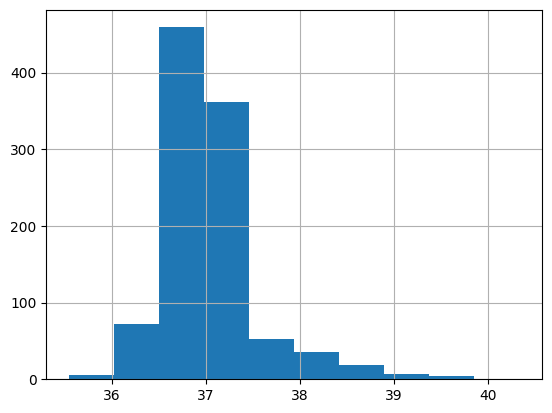

In [ ]:
y_tempTarget.hist()

In [ ]:
#check what kinds of datatypes we are working with, since its many numerical values, it is expected to see many floats:
X_tempFeature.dtypes

,0
T_atm,float64
Humidity,float64
Distance,float64
T_offset1,float64
Max1R13_1,float64
Max1L13_1,float64
aveAllR13_1,float64
aveAllL13_1,float64
T_RC1,float64
T_RC_Dry1,float64


In [ ]:
#check if there's any duplicated data values
#we want to get a value of 0, as this would indicate that our dataset has no duplicated values
X_tempFeature.duplicated().sum()

#y_tempTarget.duplicated().sum()

#check if there are any missing (null) values
print(X_tempFeature.isnull().sum())

T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64


In [ ]:
#calculate a correlation matrix, to give us a table to help us see how each cell has a correlation coefficient
#between two features, this will help us see how features in our dataset is correlated with eachother.

# Drop non-numeric columns (we dont want Male for example)
X_tempFeature_numeric = X_tempFeature.select_dtypes(include=['float64', 'int64'])


# Calculate the correlation matrix
correlation_matrix = X_tempFeature_numeric.corr()

print(correlation_matrix)

                T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  \
T_atm        1.000000  0.118906 -0.221971   0.616506   0.276526   0.293385   
Humidity     0.118906  1.000000  0.067848   0.223303   0.051374   0.060633   
Distance    -0.221971  0.067848  1.000000  -0.160724  -0.129205  -0.114154   
T_offset1    0.616506  0.223303 -0.160724   1.000000   0.240163   0.261225   
Max1R13_1    0.276526  0.051374 -0.129205   0.240163   1.000000   0.901340   
Max1L13_1    0.293385  0.060633 -0.114154   0.261225   0.901340   1.000000   
aveAllR13_1  0.272333  0.101084 -0.107234   0.238832   0.869183   0.775794   
aveAllL13_1  0.314168  0.111051 -0.107584   0.281091   0.827747   0.898357   
T_RC1        0.287880  0.058287 -0.143372   0.249881   0.981905   0.907019   
T_RC_Dry1    0.281678  0.045343 -0.130023   0.242938   0.995477   0.901322   
T_RC_Wet1    0.318007  0.082684 -0.163681   0.281224   0.942504   0.896063   
T_RC_Max1    0.285673  0.057869 -0.141000   0.248239   0.981198 

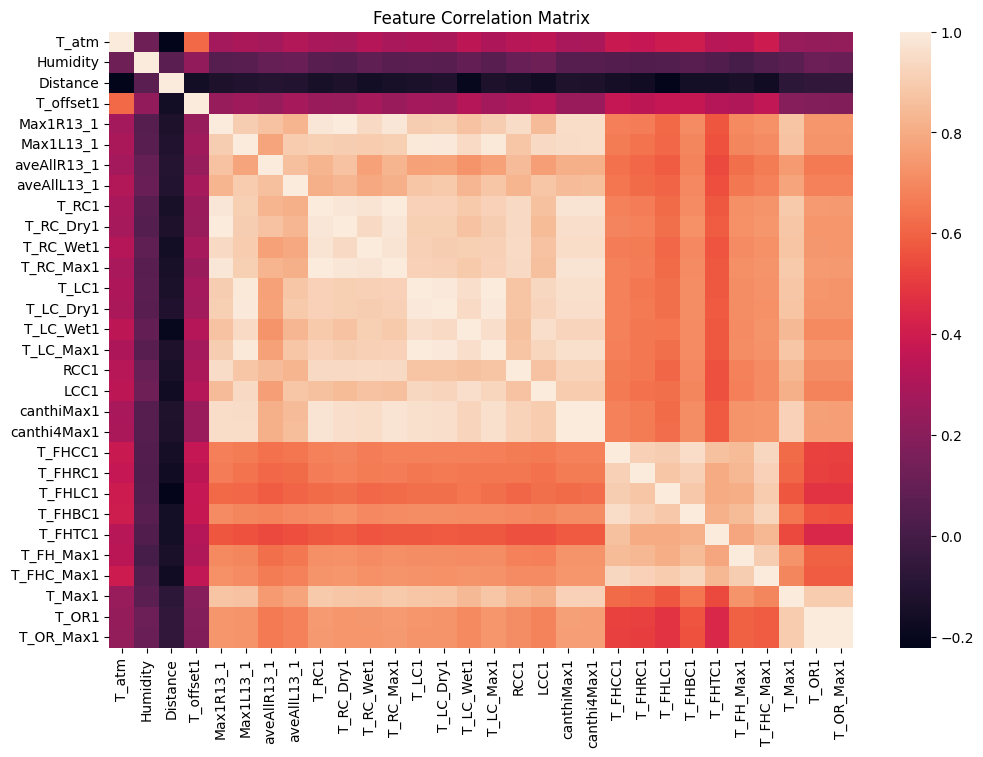

In [ ]:
#to visually see the correlation matrix, we can use a heatmap
# Plot the heatmap
plt.figure(figsize=(12,8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
sns.heatmap(correlation_matrix)
plt.title('Feature Correlation Matrix')
plt.show()

#interpretation of the feature correlation:
# Positive Correlations, where one feature increases as the other does are typically shown in shades of one color
#(e.g., red),
#while negative correlations, one feature decreases as other increases)
#are shown in shades of another color (e.g., blue)

count    1017.000000
mean       37.027955
std         0.509950
min        35.540000
25%        36.740000
50%        36.940000
75%        37.140000
max        40.340000
Name: aveOralM, dtype: float64
-------------------------------------------------------


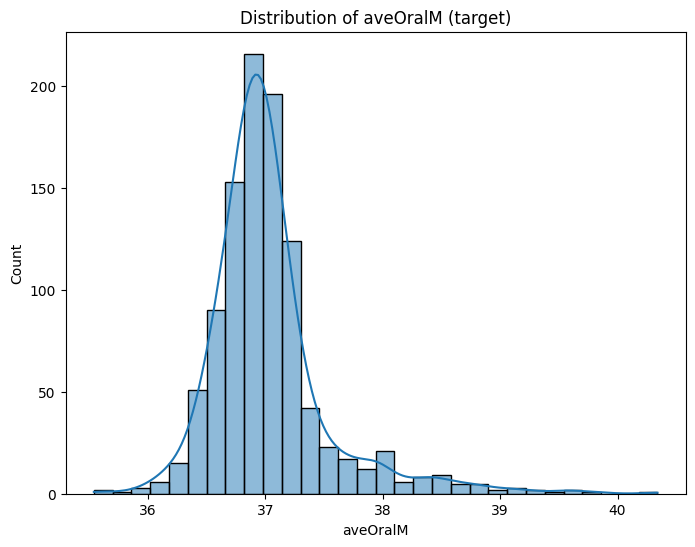

In [ ]:
#since we are trying to predict our target value y_tempTarget specifically (aveOralM), since its the column
#that is asked for us to predict in this assignment

print(y_tempTarget.describe())

print(55 * '-')
#check what kind of distribution our target value has
plt.figure(figsize=(8,6))
sns.histplot(y_tempTarget, bins=30, kde=True)
plt.title('Distribution of aveOralM (target)')
plt.show()

array([[<Axes: title={'center': 'T_atm'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'T_offset1'}>,
        <Axes: title={'center': 'Max1R13_1'}>],
       [<Axes: title={'center': 'Max1L13_1'}>,
        <Axes: title={'center': 'aveAllR13_1'}>,
        <Axes: title={'center': 'aveAllL13_1'}>,
        <Axes: title={'center': 'T_RC1'}>,
        <Axes: title={'center': 'T_RC_Dry1'}>],
       [<Axes: title={'center': 'T_RC_Wet1'}>,
        <Axes: title={'center': 'T_RC_Max1'}>,
        <Axes: title={'center': 'T_LC1'}>,
        <Axes: title={'center': 'T_LC_Dry1'}>,
        <Axes: title={'center': 'T_LC_Wet1'}>],
       [<Axes: title={'center': 'T_LC_Max1'}>,
        <Axes: title={'center': 'RCC1'}>,
        <Axes: title={'center': 'LCC1'}>,
        <Axes: title={'center': 'canthiMax1'}>,
        <Axes: title={'center': 'canthi4Max1'}>],
       [<Axes: title={'center': 'T_FHCC1'}>,
        <Axes: title={'cente

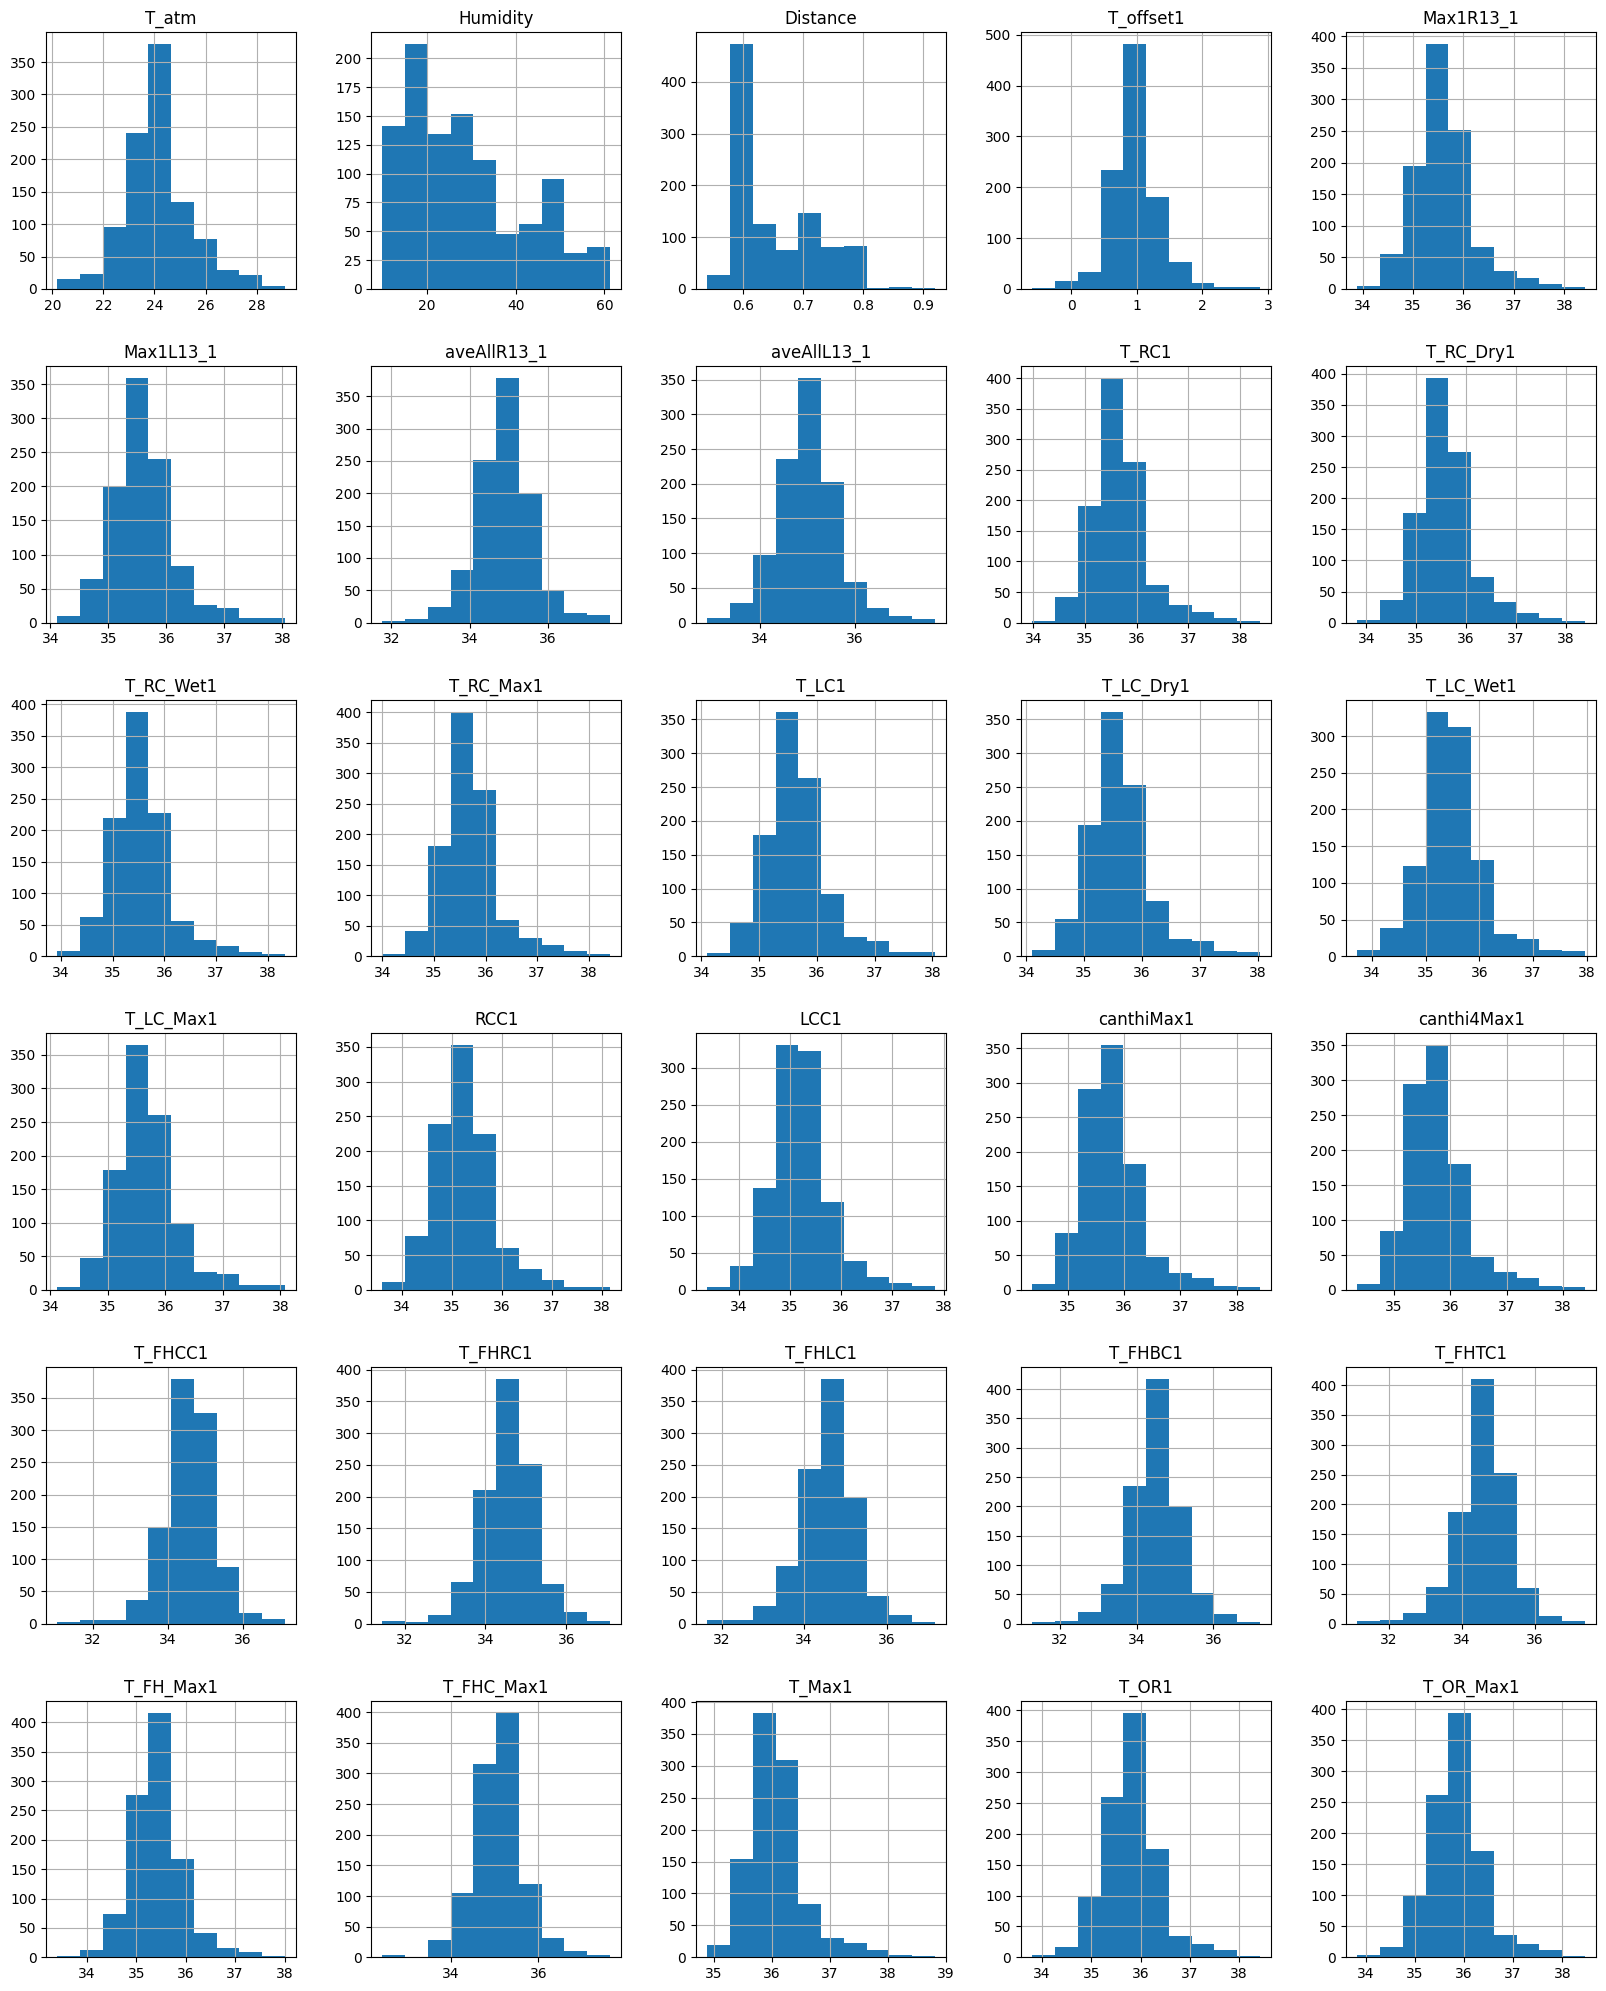

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

#need to perform one-hot encoding, to not deal with the categorical values
X = pd.get_dummies(X_tempFeature, drop_first=True)

# after that, we have some boolean objects left over, this is also a sort of categorical value in this case
#so lets convert them to integers for future calculations.
boolean_columns = X_tempFeature.select_dtypes(include=['bool']).columns

# Create a dictionary to map boolean columns to int
dictToInt = {col: 'int' for col in boolean_columns}

# Convert the boolean columns to integers
X_tempFeature = X_tempFeature.astype(dictToInt)

scaler = StandardScaler()

# Select only the numerical columns
numerical_columns = X_tempFeature.select_dtypes(include=float).columns

# Apply StandardScaler to the numerical columns
X_tempFeature[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Display the histogram after scaling
X.hist(figsize=(20, 25))

#  **Dataset 2: CDC Diabetes Health Indicators**

## fetch dataset
``` cdc_diabetes_health_indicators = fetch_ucirepo(id=891) ```

## Returns

```
dataset
  data: Contains dataset matrices as pandas dataframes
    ids: Dataframe of ID columns
    features: Dataframe of feature columns
    targets: Dataframe of target columns
    original: Dataframe consisting of all IDs, features, and targets
    headers: List of all variable names/headers
  metadata: Contains metadata information about the dataset
    See Metadata section below for details
  variables: Contains variable details presented in a tabular/dataframe format
    name: Variable name
    role: Whether the variable is an ID, feature, or target
    type: Data type e.g. categorical, integer, continuous
    demographic: Indicates whether the variable represents demographic data
    description: Short description of variable
    units: variable units for non-categorical data
    missing_values: Whether there are missing values in the variable's column
```




In [ ]:
# fetch dataset
cdc = fetch_ucirepo(id=891)

# check for missing values
contains_yes = (cdc.variables.missing_values == 'yes').any()
if contains_yes:
  print("There is at least one 'yes' value in the DataFrame.")
else:
  print("no missing values")



no missing values


In [ ]:
total_entries = cdc.data.targets['Diabetes_binary'].count()
count_ones = cdc.data.targets['Diabetes_binary'].sum()
result = (count_ones / total_entries) * 100
rounded_result = round(result, 3)

print(f"Total number of people: {total_entries}")
print(f"Number of people classified with diabetes or pre-diabetes: {count_ones}")
print(f"Percentage of people classified with diabetes or pre-diabetes: {rounded_result}% ")

Total number of people: 253680
Number of people classified with diabetes or pre-diabetes: 35346
Percentage of people classified with diabetes or pre-diabetes: 13.933% 


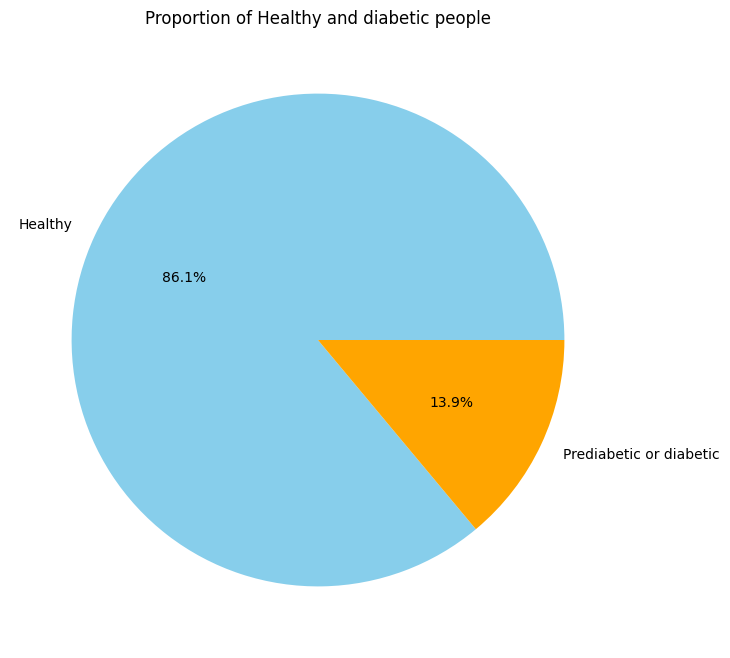

In [ ]:
# Calculate counts for pie chart
target_counts = cdc.data.targets['Diabetes_binary'].value_counts()


# Custom labels for the pie chart
new_labels = {0: 'Healthy', 1: 'Prediabetic or diabetic'}

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=[new_labels[label] for label in target_counts.index], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Proportion of Healthy and diabetic people')
plt.show()



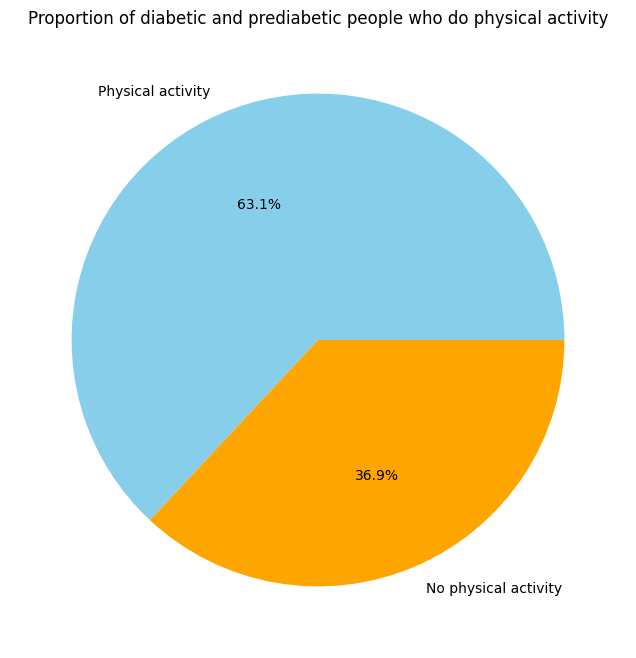

In [ ]:
# physical activity in prediabetic/diabetic people
df_diabetes = cdc.data.original[cdc.data.original["Diabetes_binary"] == 1]
df_diabetes_phys = df_diabetes[df_diabetes["PhysActivity"] == 1]
# 22287 yes

target_counts = df_diabetes["PhysActivity"].value_counts()


# Custom labels for the pie chart
new_labels = {0: 'No physical activity', 1: 'Physical activity'}

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=[new_labels[label] for label in target_counts.index], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Proportion of diabetic and prediabetic people who do physical activity')
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', None)
cdc.data.headers

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [ ]:
cdc.variables.description

,description
0,Patient ID
1,0 = no diabetes 1 = prediabetes or diabetes
2,0 = no high BP 1 = high BP
3,0 = no high cholesterol 1 = high cholesterol
4,0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
5,Body Mass Index
6,Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
7,(Ever told) you had a stroke. 0 = no 1 = yes
8,coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
9,physical activity in past 30 days - not including job 0 = no 1 = yes


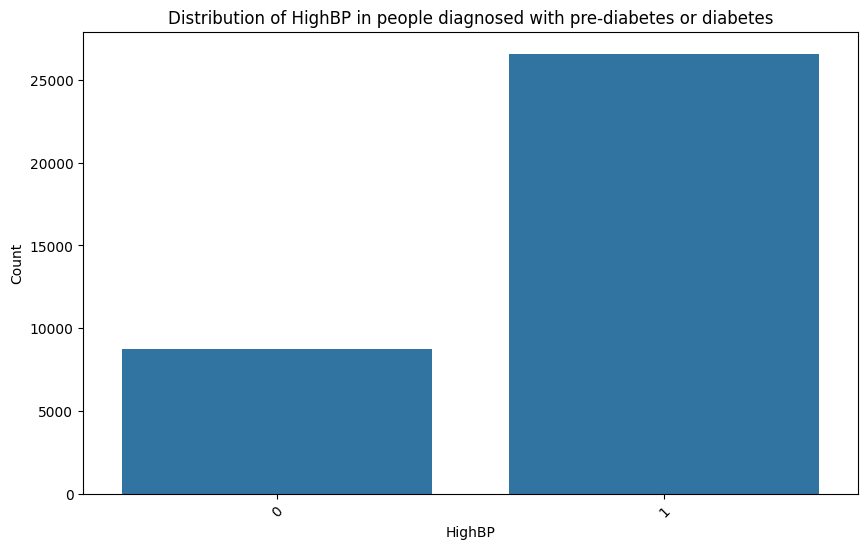

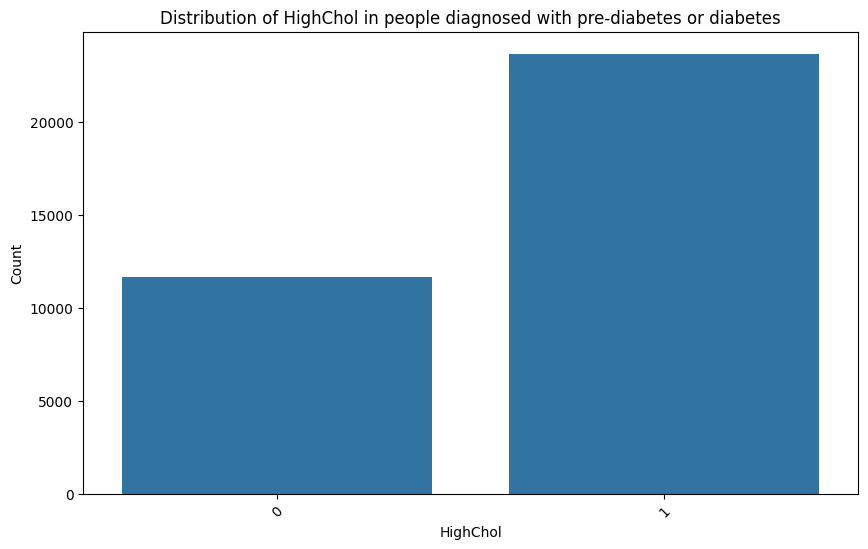

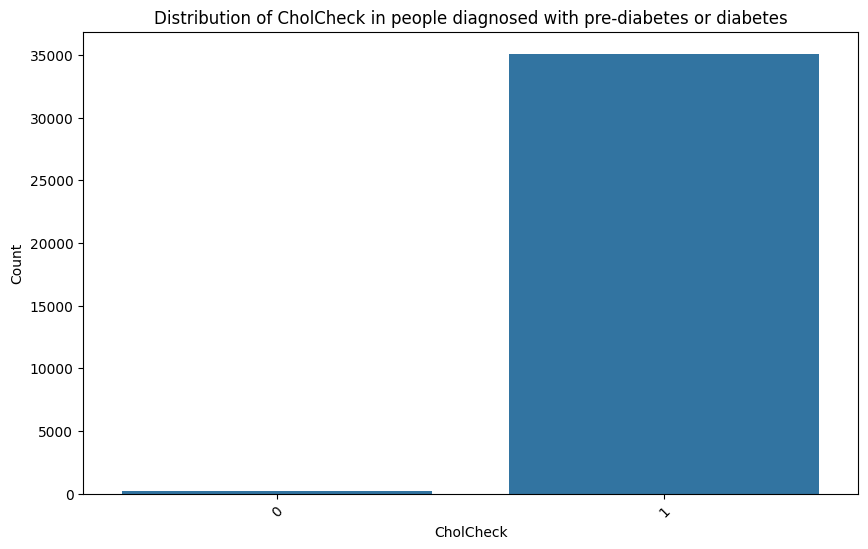

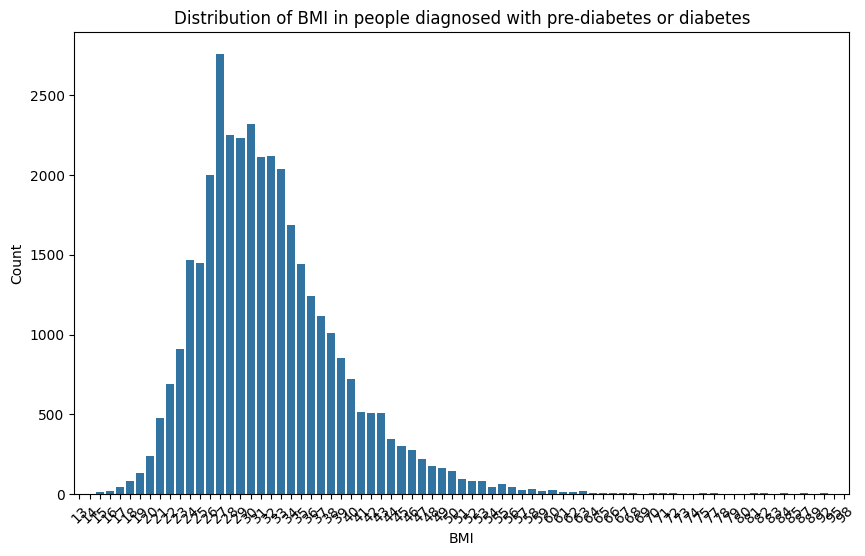

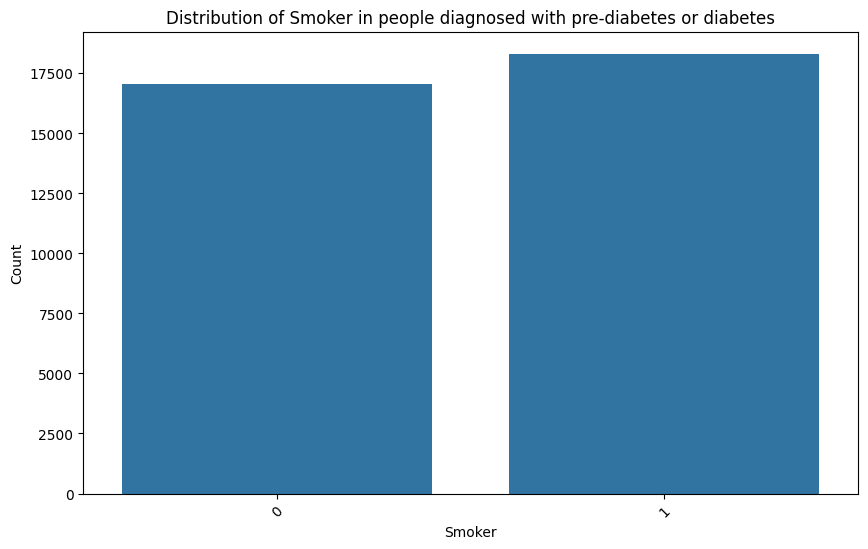

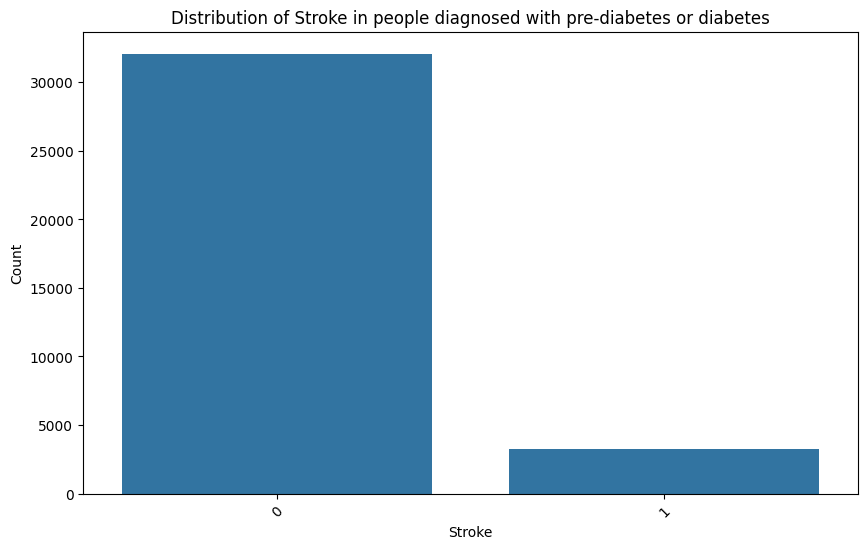

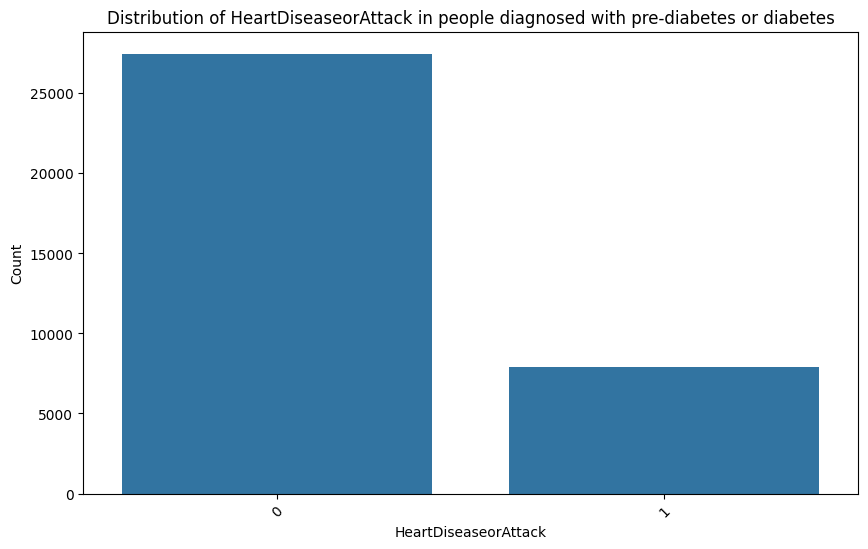

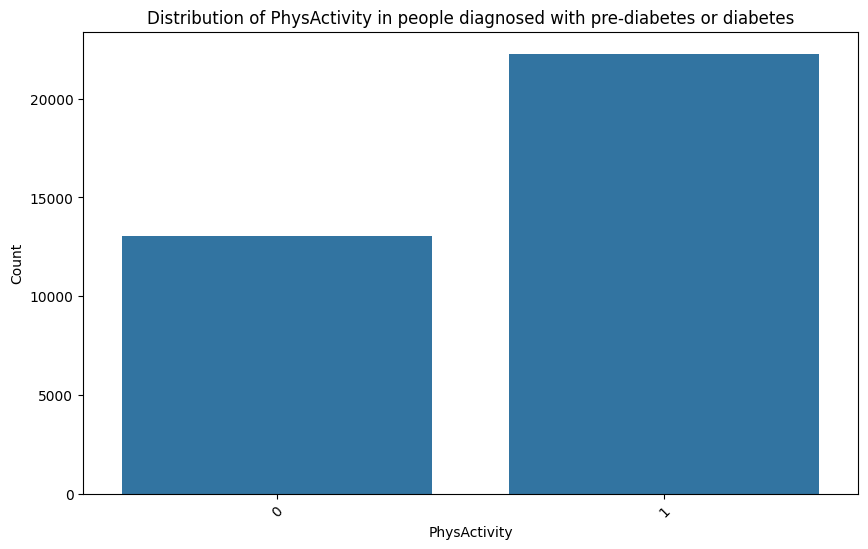

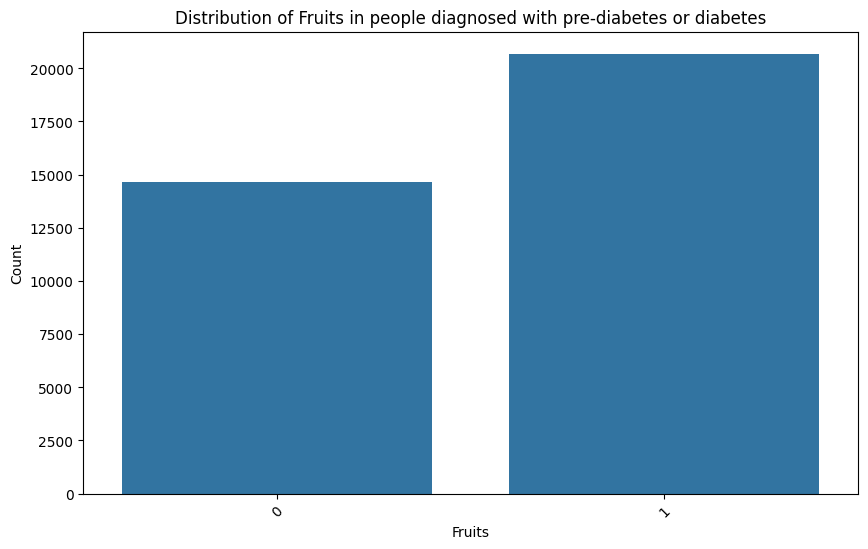

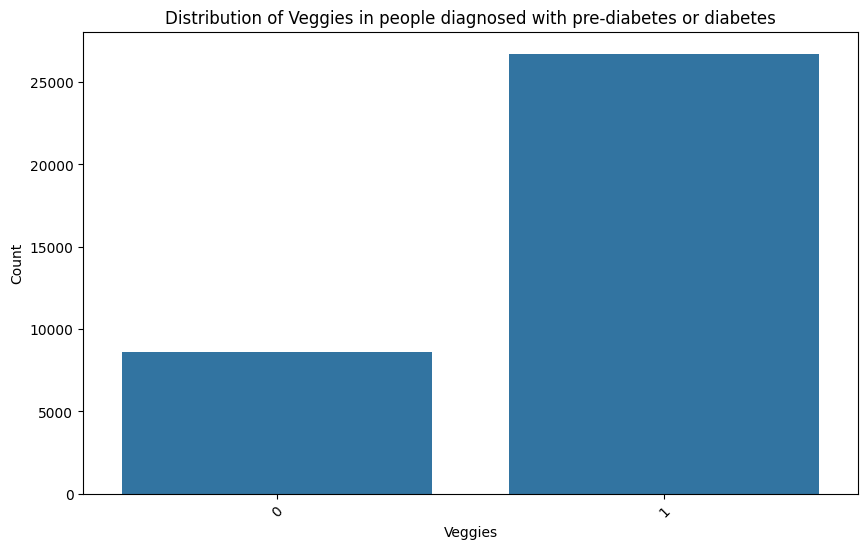

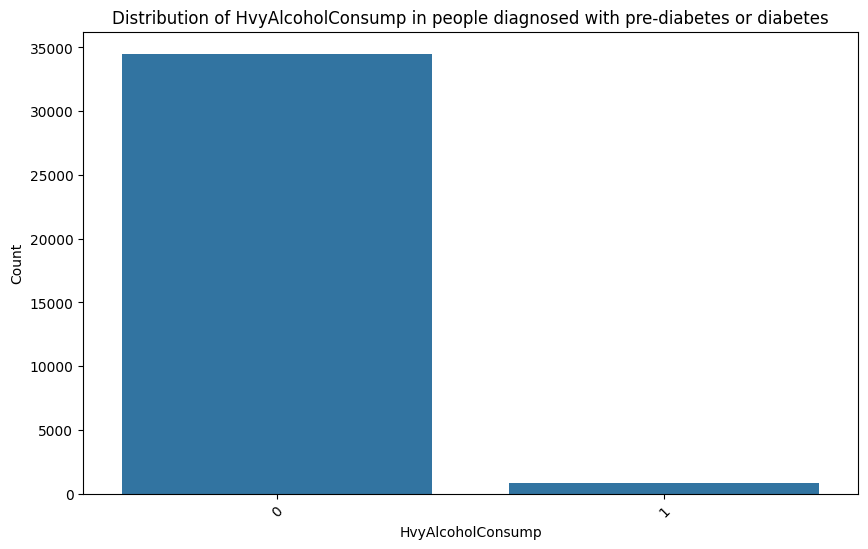

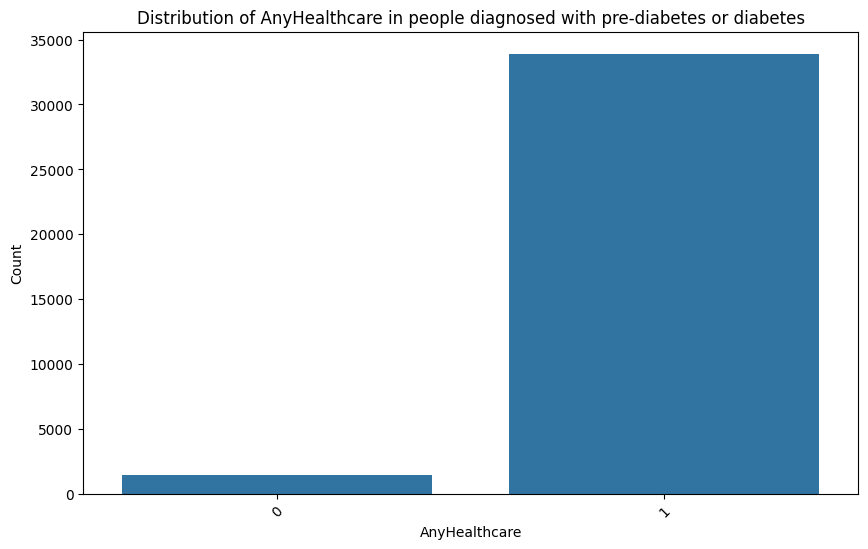

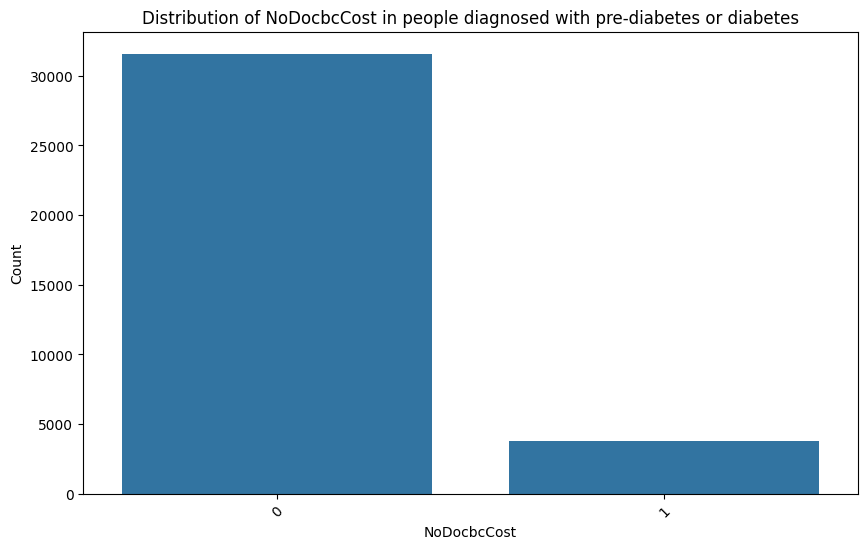

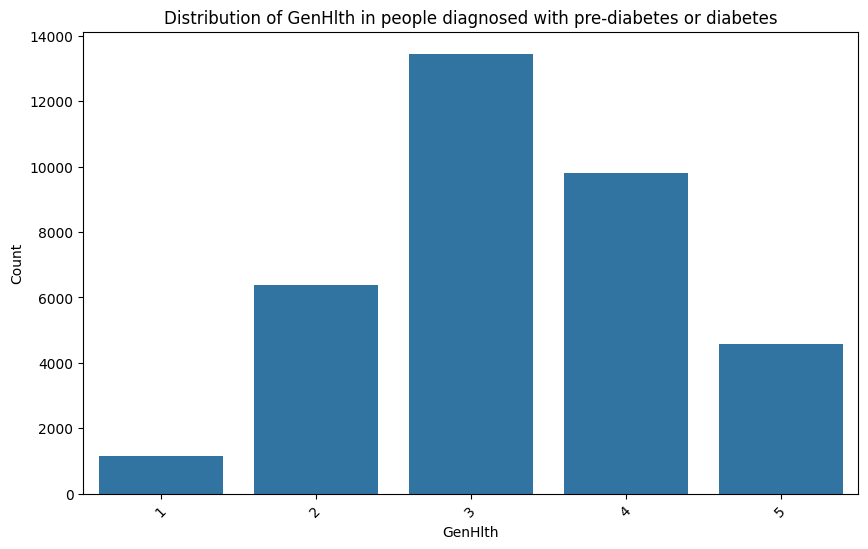

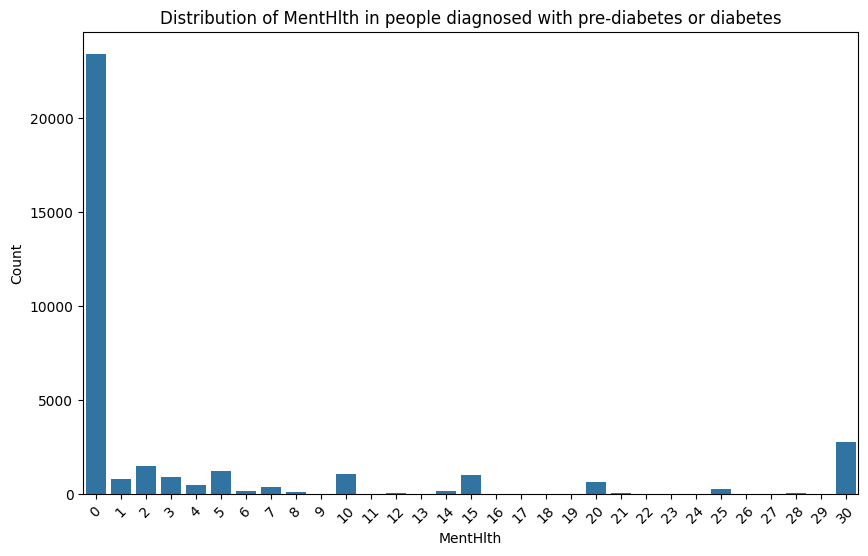

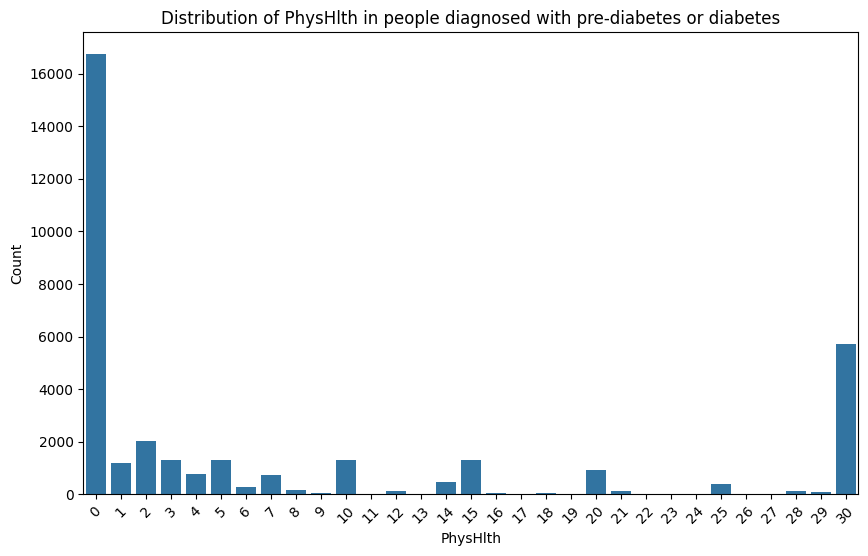

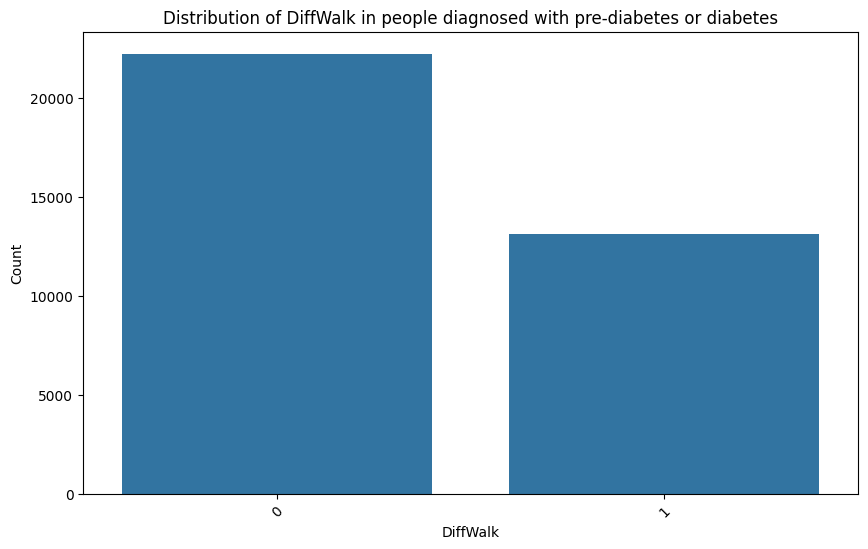

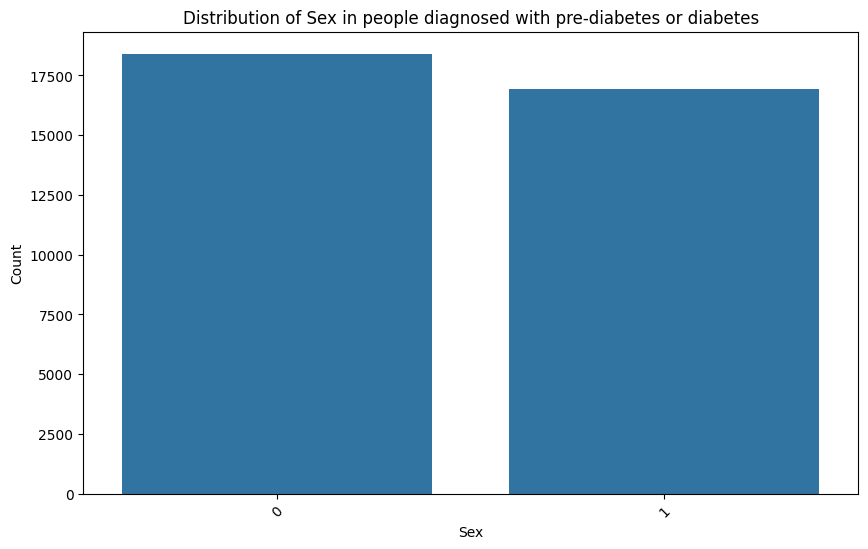

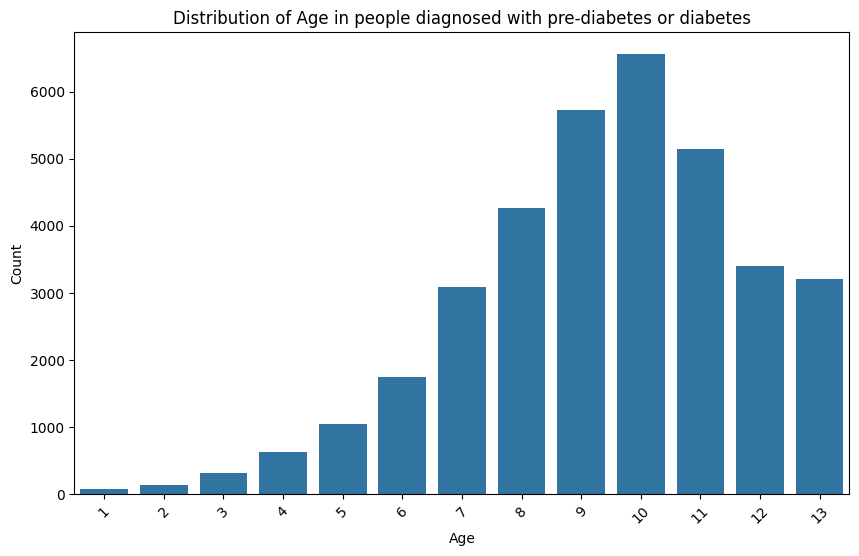

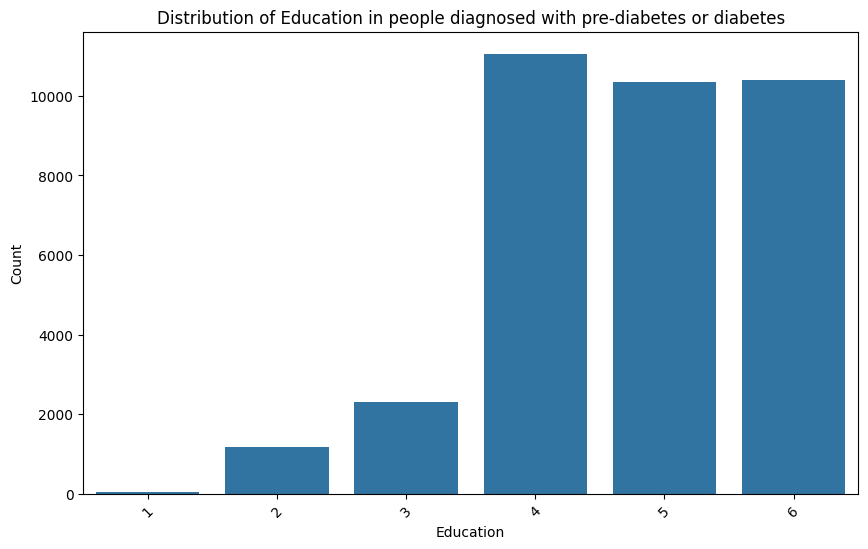

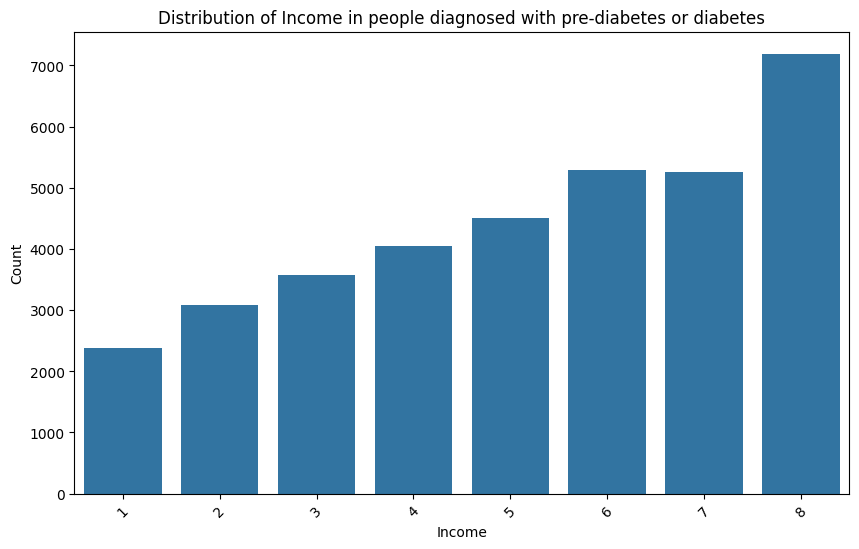

In [ ]:
cdc = fetch_ucirepo(id=891)
df = cdc.data.original
diabetes_df = df[df['Diabetes_binary'] == 1]

# categorical_columns = ['HighBP', 'HighChol', 'CholCheck',
#        'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Fruits',
#        'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
#        'GenHlth', 'DiffWalk', 'Sex']

categorical_columns = diabetes_df.columns[2:].tolist()

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=diabetes_df, x=column)
    plt.title(f'Distribution of {column} in people diagnosed with pre-diabetes or diabetes')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-17-987cf8606c64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df[features_to_normalize] = scaler.fit_transform(diabetes_df[features_to_normalize])


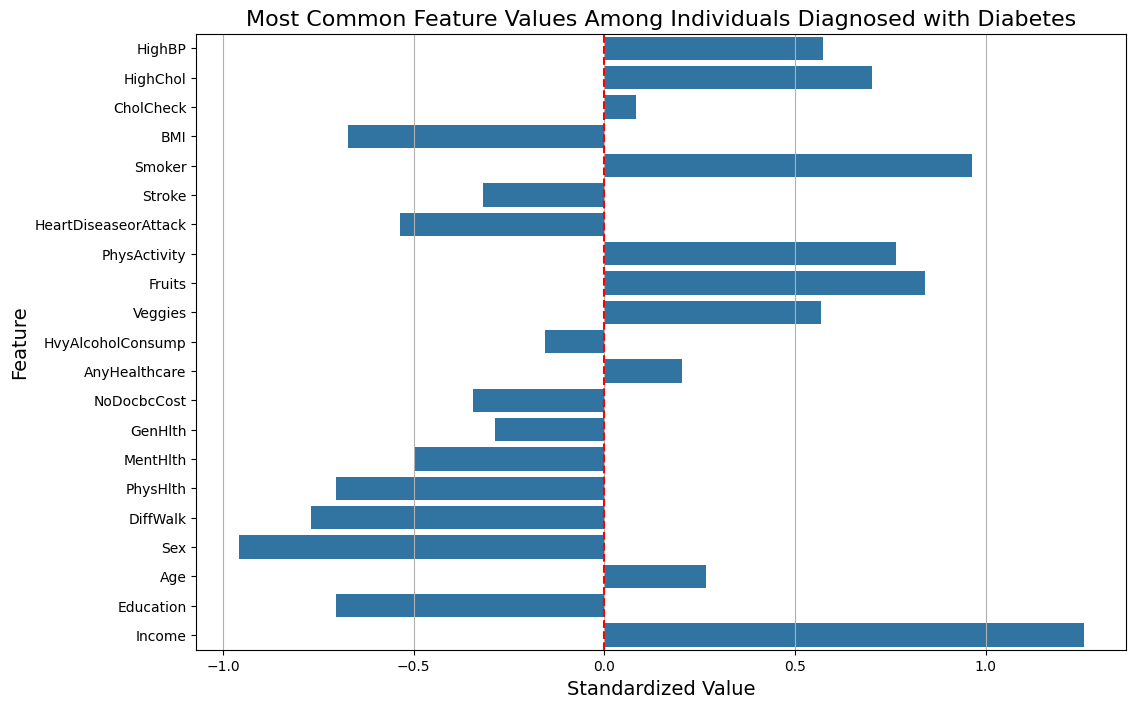

In [ ]:
features_to_normalize = diabetes_df.columns[2:]
scaler = StandardScaler()
diabetes_df[features_to_normalize] = scaler.fit_transform(diabetes_df[features_to_normalize])

most_common_feature = diabetes_df.iloc[:, 2:].mode().iloc[0]

features_df = most_common_feature.reset_index()
features_df.columns = ['Feature', 'Value']

plt.figure(figsize=(12, 8))
sns.barplot(x='Value', y='Feature', data=features_df)
plt.title('Most Common Feature Values Among Individuals Diagnosed with Diabetes', fontsize=16)
plt.xlabel('Standardized Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.axvline(0, color='red', linestyle='--')
plt.grid(axis='x')

plt.show()
# Print results
# print("Most common features among people diagnosed with diabetes:")
# print(most_common_feature)

#  **analytical linear regression solution for Dataset 1**

In [ ]:
#Linear regression least square method (code from colab provided, with 1 minor adjustement)

class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1

        #manually calculate the weight (least square)
        #this will calculate the value that MINIMIZES the cost function

        #formula: w = (X^T * X)^-1 * X^T * y

        x_transpose = x.T
        x_transpose_dot_x = x_transpose @ x
        x_transpose_dot_y = x_transpose @ y

        self.w = np.linalg.inv(x.T @ x)@x.T@y
        #self.w = np.linalg.inv(x_transpose_dot_x) @ x_transpose_dot_y

        return self


    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]  # Ensure that x is 2D if it's 1D (this is the minor adjustment)
                            #to test the model on other multivariate linear data
        N = x.shape[0]  # Calculate N inside the predict function
        if self.add_bias:
            x = np.column_stack([x, np.ones(N)])  # Add bias column
        yh = x @ self.w  # Predict the y values
        return yh


In [ ]:
#Linear regression least square method (code from colab provided, with 1 minor adjustement)
'''
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1

        self.w = np.linalg.lstsq(x, y, rcond=None)[0]          #return w for the least square difference
        return self


    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]  # Ensure that x is 2D if it's 1D (this is the minor adjustment)
                            #to test the model on other multivariate linear data
        N = x.shape[0]  # Calculate N inside the predict function
        if self.add_bias:
            x = np.column_stack([x, np.ones(N)])  # Add bias column
        yh = x @ self.w  # Predict the y values
        return yh
'''

"\nclass LinearRegression:\n    def __init__(self, add_bias=True):\n        self.add_bias = add_bias\n        pass\n\n    def fit(self, x, y):\n        if x.ndim == 1:\n            x = x[:, None]                         #add a dimension for the features\n        N = x.shape[0]\n        if self.add_bias:\n            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1\n\n        self.w = np.linalg.lstsq(x, y, rcond=None)[0]          #return w for the least square difference\n        return self\n\n\n    def predict(self, x):\n        if x.ndim == 1:\n            x = x[:, None]  # Ensure that x is 2D if it's 1D (this is the minor adjustment)\n                            #to test the model on other multivariate linear data\n        N = x.shape[0]  # Calculate N inside the predict function\n        if self.add_bias:\n            x = np.column_stack([x, np.ones(N)])  # Add bias column\n        yh = x @ self.w  # Predict the y values\n        return yh\n"

Predicted values: [ 5.  7.  9. 11. 13.]
True values: [ 5  7  9 11 13]
-------------------------------------------------------
Predicted values: [ 6.34375 13.125   19.90625 26.6875  33.46875]
True values: [12 17 22 27 32]
-------------------------------------------------------
Predicted values without bias: [ 2.  4.  6.  8. 10.]
True values: [ 2  4  6  8 10]
-------------------------------------------------------


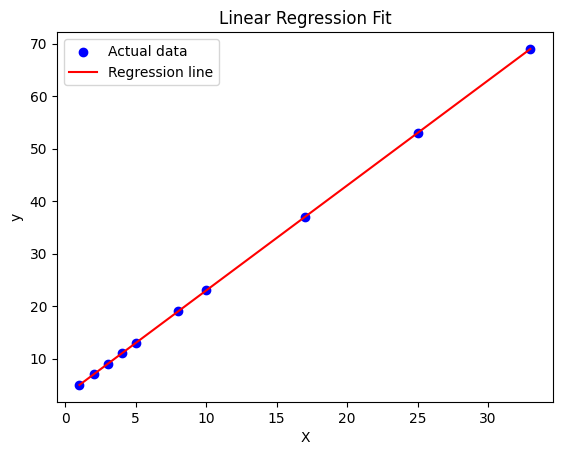

-------------------------------------------------------


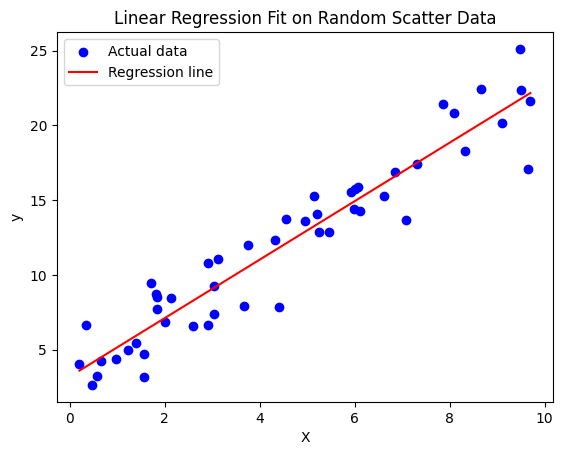

In [ ]:
#Tester samples for linear data: (simple and multivariate) (CAN REMOVE THIS LATER!!)

X_test = np.array([1, 2, 3, 4, 5])  # Feature
y_test = 2 * X_test + 3             # Target (y = 2x + 3)

# Initialize and train the model
model = LinearRegression(add_bias=True)
model.fit(X_test, y_test)

# Predict using the trained model
y_pred = model.predict(X_test)

print("Predicted values:", y_pred)
print("True values:", y_test)



print('-'*55)



# Create multivariate linear data
X_test = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])  # Two features
y_test = 2 * X_test[:, 0] + 3 * X_test[:, 1] + 4             # y = 2*x1 + 3*x2 + 4

# Initialize and train the model
model = LinearRegression(add_bias=True)
model.fit(X_test, y_test)

# Predict using the trained model
y_pred = model.predict(X_test)

print("Predicted values:", y_pred)
print("True values:", y_test)




print('-'*55)




# Simple linear data without bias
X_test = np.array([1, 2, 3, 4, 5])
y_test = 2 * X_test  # y = 2x (no constant)

# Initialize and train the model without bias, set bias to false so
model = LinearRegression(add_bias=False)
model.fit(X_test, y_test)

# Predict using the trained model
y_pred = model.predict(X_test)

print("Predicted values without bias:", y_pred)
print("True values:", y_test)



print('-'*55)



# Create a simple linear dataset
X_test = np.array([1, 2, 3, 4, 5, 8, 10, 17, 25, 33])  # Feature
y_test = 2 * X_test + 3             # Target (y = 2x + 3)

# Initialize and train the model
model = LinearRegression(add_bias=True)
model.fit(X_test, y_test)

# Predict using the trained model
y_pred = model.predict(X_test)

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual data')

# Plot the regression line (predicted values)
plt.plot(X_test, y_pred, color='red', label='Regression line')

# Adding labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()


print('-'*55)

#MAKE A SCATTERED DATA POINTS, THEN TRY TO FIT THE LINEAR REGRESSION TO SEE IF IT WORKS

# Generate random data points for the scatter plot. (REMOVE THIS, THIS IS JUST A TEST SIMILAR TO LECTURE)
np.random.seed(42)  # For reproducibility
X_test = np.random.rand(50) * 10  # Random numbers between 0 and 10
y_test = 2 * X_test + 3 + np.random.randn(50) * 2  # y = 2x + 3 + some noise

# Initialize and train the model, just like the other tests, set model to our linearRegression class
model = LinearRegression(add_bias=True)
model.fit(X_test, y_test)

# Predict using the trained model
y_pred = model.predict(X_test)

# Plot the actual data points (scatter plot)
plt.scatter(X_test, y_test, color='blue', label='Actual data')

# Plot the regression line (predicted values)
# To make the line smooth, sort the values of X and y_pred
X_test_sorted = np.sort(X_test)
y_pred_sorted = np.sort(y_pred)
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Regression line')

# Adding labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit on Random Scatter Data')
plt.legend()

# Show the plot
plt.show()

# **mini-batch stochastic gradient descent for linear regression**

## Linear Regression mini-batch STGD (DONE)

In [ ]:

class LinearRegressionMiniBatchSGD:

    def __init__(self, LearningRate=0.01, epsilon=1e-7, iterations=1000, minibatch_size=16, add_bias=True):
        self.LearningRate = LearningRate
        self.epsilon = epsilon
        self.iterations = iterations
        self.minibatch_size = minibatch_size
        self.add_bias = add_bias
        self.w = None

        # self.w is the weight vector (shows how much each feature contributes to the final prediction)

    # our (LOSS FUNCTION), from the slides formula
    def mean_square_error(self, actual, predicted):
        n_samples = len(actual)
        mse = (1 / n_samples) * np.sum((actual - predicted) ** 2)
        return mse

    def make_batch(self, x, y, batch_size):
        mini_batches = []
        data_stack = np.hstack((x, y.reshape(-1, 1)))
        # to randomize the batches, use np.random.shuffle, as
        # this would randomly shuffle the data for later use
        np.random.shuffle(data_stack)

        for i in range(0, len(data_stack), batch_size):
            batch = data_stack[i:i + batch_size]
            x_batch = batch[:, :-1]
            y_batch = batch[:, -1]
            mini_batches.append((x_batch, y_batch))
        return mini_batches

    # NEED TO MAKE A GRADIENT FUNCTION
    def compute_gradient(self, x_batch, y_batch, y_pred_batch):
        # Compute the gradient for the mini-batch based on the Mean Squared Error loss function.
        # the @ here is for matrix multiplication. the .T is transpose, these are to help us
        # compute the formula for gradient:
        gradient = -2 * x_batch.T @ (y_batch - y_pred_batch) / x_batch.shape[0]

        return gradient

    def fit(self, features, actual):

        self.loss_history = []

        # Ensure features are in NumPy array form
        features = np.array(features)
        actual = np.array(actual)



        # If features are 1D, reshape them
        if features.ndim == 1:
            features = features[:, None]

        n = features.shape[0]

        # Add bias term if needed
        if self.add_bias:
            features = np.column_stack([features, np.ones(n)])

        # Initialize weights if not already initialized
        if self.w is None:
            self.w = np.zeros(features.shape[1])

        # Main loop for iterations
        for i in range(self.iterations):
            mini_batches = self.make_batch(features, actual, self.minibatch_size)
            epoch_loss = 0

            for batch in mini_batches:
                # Unpack the batch into x_batch and y_batch
                x_batch, y_batch = batch

                # Ensure x_batch and y_batch are NumPy arrays
                x_batch = np.array(x_batch)
                y_batch = np.array(y_batch)

                # Predict output for the current batch
                y_pred_batch = x_batch @ self.w

                # Calculate the loss for the batch
                loss = self.mean_square_error(y_batch, y_pred_batch)
                epoch_loss += loss

                # Compute the gradient of the loss function (MSE gradient)
                gradient = self.compute_gradient(x_batch, y_batch, y_pred_batch)

                # Update the weights using the computed gradient
                self.w -= self.LearningRate * gradient

            # Append the average loss for the epoch
            self.loss_history.append(epoch_loss / len(mini_batches))

        return self

    def predict(self, features):
        # input features are for which predictions are to be made

        if features.ndim == 1:
            features = features[:, None]

        # determines the number of samples in the input feature matrix
        n_samples = features.shape[0]

        # add bias term if the model includes bias
        if self.add_bias:
            features = np.column_stack([features, np.ones(n_samples)])

        # compute the predictions: y_pred = X * weights
        y_preds = features @ self.w

        return y_preds


# **logistic regression class with mini-batch stochastic gradient descent for Dataset 2**

In [ ]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False, batch_size=None):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = int(max_iters)
        self.verbose = verbose
        self.batch_size = batch_size

    def logistic(self, z):
        return 1 / (1 + np.exp(-z))

    def gradient(self, x, y):
        N, D = x.shape
        yh = self.logistic(np.dot(x, self.w))
        grad = np.dot(x.T, yh - y) / N
        return grad

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])  # Add bias term
        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        gradient_norms = []  # To store gradient norms for convergence tracking
        performance_metrics = []  # To store performance metrics over time

        for _ in range(self.max_iters):
            if self.batch_size is not None:
                indices = np.random.choice(N, self.batch_size, replace=False)
                x_batch, y_batch = x[indices], y[indices]
            else:
                x_batch, y_batch = x, y

            g = self.gradient(x_batch, y_batch)
            self.w = self.w - self.learning_rate * g
            gradient_norms.append(np.linalg.norm(g))

            # Evaluate performance every 100 iterations
            if t % 100 == 0:
                train_acc, test_acc = evaluate_performance(self, x_batch, y_batch, x_test, y_test)
                performance_metrics.append((train_acc, test_acc))

            if np.linalg.norm(g) < self.epsilon:
                break
            t += 1

        if self.verbose:
            print(f"Terminated after {t} iterations with gradient norm {np.linalg.norm(g)}.")

        return gradient_norms, performance_metrics

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]

        if self.add_bias and x.shape[1] + 1 == len(self.w):  # Check if we need to add bias
            x = np.column_stack([x, np.ones(Nt)])  # Add bias to the input data

        # Perform prediction (dot product between input and weights)
        yh = self.logistic(np.dot(x, self.w))

        return yh




# **Experiments And optional**

Experiments related to linear regression models

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_tempFeature, y_tempTarget, test_size=0.2, random_state=42)


In [ ]:
#QUESTION 1

# Train the Linear Regression model
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

# Predictions on the training and test sets
y_train_pred_reg = linear_model.predict(x_train)
y_test_pred_reg = linear_model.predict(x_test)

# Performance Evaluation
train_mse = mean_squared_error(y_train, y_train_pred_reg)
test_mse = mean_squared_error(y_test, y_test_pred_reg)

# Report Linear Regression performance
print(f"Linear Regression - Training MSE: {train_mse}")
print(f"Linear Regression - Test MSE: {test_mse}")




Linear Regression - Training MSE: 0.06456249495262106
Linear Regression - Test MSE: 0.06133132643355502


In [ ]:
linear_sgd_model = LinearRegressionMiniBatchSGD(LearningRate=0.001, iterations=5000, minibatch_size=32)

linear_sgd_model.fit(x_train, y_train)

# Predictions on the training and test sets
y_train_pred_reg = linear_sgd_model.predict(x_train)
y_test_pred_reg = linear_sgd_model.predict(x_test)

# Performance Evaluation
train_mse = mean_squared_error(y_train, y_train_pred_reg)
test_mse = mean_squared_error(y_test, y_test_pred_reg)

# Report Linear Regression performance
print(f"Linear Regression mini-batch SGD - Training MSE: {train_mse}")
print(f"Linear Regression mini-batch SGD - Test MSE: {test_mse}")


Linear Regression mini-batch SGD - Training MSE: 0.06487206827477707
Linear Regression mini-batch SGD - Test MSE: 0.060425102575316525


In [ ]:
yh = linear_model.predict(x_test)

# squared=False will give us the  RMSE
mean_squared_error(y_test, yh, squared=False)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.2476516231191611

In [ ]:
#QUESTION 2 for linear:

#Extract the weights ( or just the coefficients) from our trained Linear Regression model

#w is the self.w (for weights in our linear regression model)
linear_weights = linear_model.w

# Report the weights for each feature
print("Feature Weights in Linear Regression Model:")
print(55 * '-')
#print out each weight

print(f"Weights: {linear_weights}")

Feature Weights in Linear Regression Model:
-------------------------------------------------------
Weights: [-8.21657955e-02  9.81730459e-03 -7.36538280e-03  2.10099841e-02
 -1.17666521e-01 -9.00127808e-02  7.15975413e-03 -4.16421774e-02
  1.64659634e-01 -1.66072870e-02  1.82142988e-02  2.23180712e-02
  9.38627427e-01 -4.01165309e-02 -7.25797560e-02 -7.56852463e-01
  1.85922350e-02  8.59020079e-02 -1.90238868e-01  1.27735070e-01
 -1.42744999e-01  1.53115565e-02 -7.23662098e-02  5.71256698e-02
  2.93977404e-02  7.80046374e-02  7.64977008e-02  3.02282663e-01
  7.97017633e-02 -2.36054034e-02  3.70344847e+01]


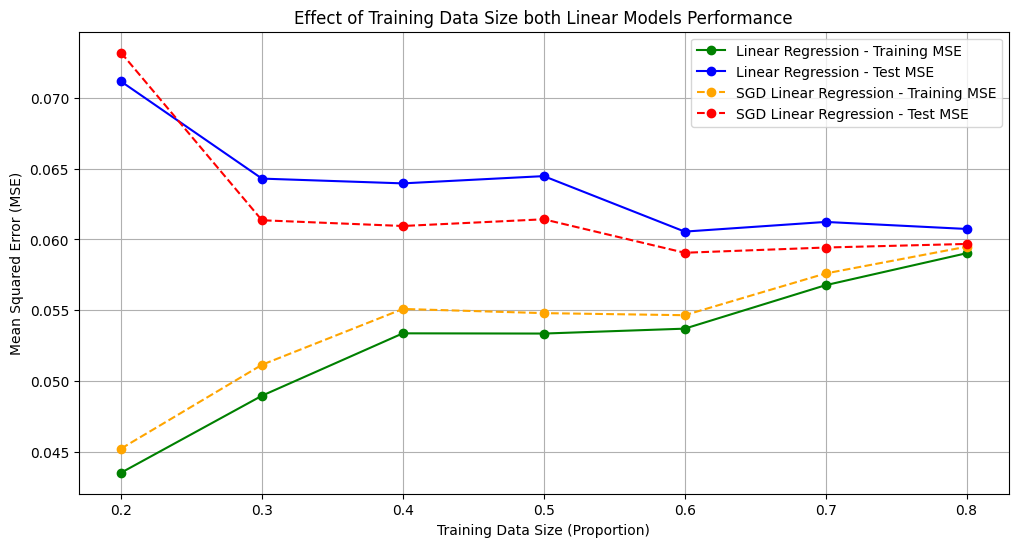

In [ ]:
#QUESTION 3 AND QUESTION 6:


# Define the training sizes
train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Initialize lists to store results for both models
train_mse_linear = []
test_mse_linear = []
train_mse_sgd = []
test_mse_sgd = []


# Loop over each training size
for train_size in train_sizes:
    # Split the training data into a subset of the desired size
    x_train_subset, _, y_train_subset, _ = train_test_split(x_train, y_train, train_size=train_size, random_state=42)
#********************************************************************************************#
#Linear Regression Model
#********************************************************************************************#

    linear_model = LinearRegression()  # Your linear regression model
    linear_model.fit(x_train_subset, y_train_subset)

    # Predict on the training subset and test set
    y_train_pred_reg = linear_model.predict(x_train_subset)
    y_test_pred_reg = linear_model.predict(x_test)

    # Calculate MSE for training and test sets
    train_mse_reg = mean_squared_error(y_train_subset, y_train_pred_reg)
    test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)

    # Append the results to the lists for Linear Regression
    train_mse_linear.append(train_mse_reg)
    test_mse_linear.append(test_mse_reg)
#********************************************************************************************#
#MINI-BATCH STOCHASTIC GRADIENT DESCENT LINEAR MODEL:
#********************************************************************************************#
    sgd_model = LinearRegressionMiniBatchSGD(LearningRate=1e-3, iterations=5000, minibatch_size=32)
    sgd_model.fit(np.array(x_train_subset), np.array(y_train_subset))

    # Predict on the training subset and test set
    y_train_pred_sgd = sgd_model.predict(np.array(x_train_subset))
    y_test_pred_sgd = sgd_model.predict(np.array(x_test))

    # Calculate MSE for training and test sets
    train_mse_sgd_val = mean_squared_error(y_train_subset, y_train_pred_sgd)
    test_mse_sgd_val = mean_squared_error(y_test, y_test_pred_sgd)

    # Append the results to the lists for SGD Linear Regression
    train_mse_sgd.append(train_mse_sgd_val)
    test_mse_sgd.append(test_mse_sgd_val)

# Plot the training and test performance for both models
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mse_linear, label='Linear Regression - Training MSE', marker='o', color='green')
plt.plot(train_sizes, test_mse_linear, label='Linear Regression - Test MSE', marker='o', color='blue')
plt.plot(train_sizes, train_mse_sgd, label='SGD Linear Regression - Training MSE', marker='o', linestyle='--', color='orange')
plt.plot(train_sizes, test_mse_sgd, label='SGD Linear Regression - Test MSE', marker='o', linestyle='--', color='red')
plt.xlabel('Training Data Size (Proportion)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Training Data Size both Linear Models Performance')
plt.legend()
plt.grid(True)
plt.show()

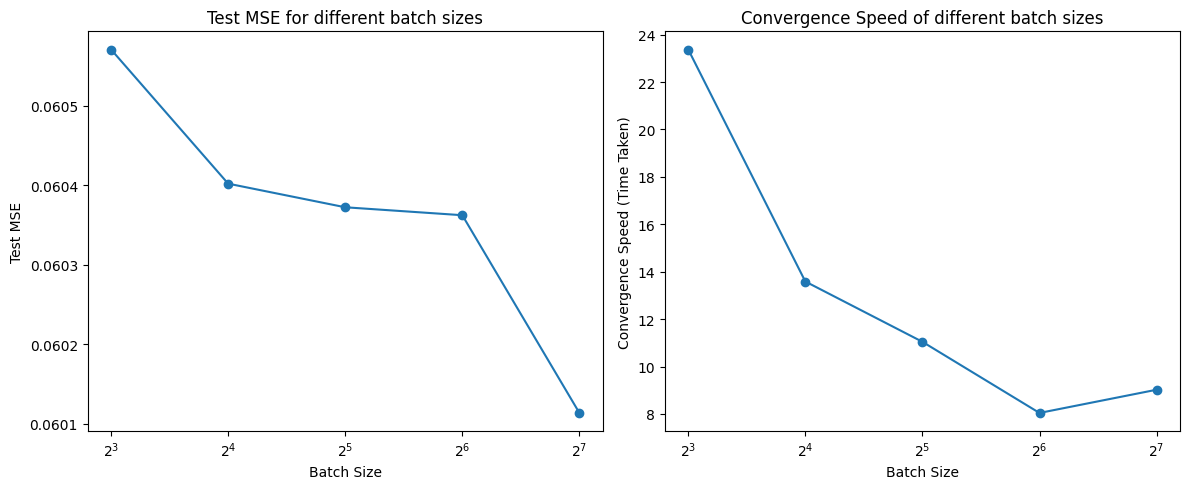

In [ ]:
#Question 4:

from time import time
#set growing batch sizes
batch_sizes = [8, 16, 32, 64, 128]
test_mse_results = []
convergence_speed_results = []

for batch_size in batch_sizes:
    model = LinearRegressionMiniBatchSGD(LearningRate=0.001, iterations=5000, minibatch_size=batch_size)

    # Track the time and iterations for convergence
    start_time = time()
    model.fit(x_train, y_train)  # Fit the model
    end_time = time()

    # Predict on the test set and calculate MSE
    y_test_pred = model.predict(x_test)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Record results
    test_mse_results.append(test_mse)
    convergence_speed_results.append(end_time - start_time)  # Convergence speed (time taken)

# Plotting results
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Test MSE
axs[0].plot(batch_sizes, test_mse_results, marker='o')
axs[0].set_title('Test MSE for different batch sizes')
axs[0].set_xlabel('Batch Size')
axs[0].set_ylabel('Test MSE')
axs[0].set_xscale('log', base=2)

# Plot Convergence Speed (iterations or time taken)
axs[1].plot(batch_sizes, convergence_speed_results, marker='o')
axs[1].set_title('Convergence Speed of different batch sizes')
axs[1].set_xlabel('Batch Size')
axs[1].set_ylabel('Convergence Speed (Time Taken)')
axs[1].set_xscale('log', base=2)  # Apply log scale

plt.tight_layout()
plt.show()

Learning Rate 0.0001:
  Train MSE: 0.06605336626313339
  Test MSE: 0.06036340395004528
----------------------------------------
Learning Rate 0.001:
  Train MSE: 0.06487344814454653
  Test MSE: 0.06038040261860106
----------------------------------------
Learning Rate 0.01:
  Train MSE: 0.06470598079797654
  Test MSE: 0.06094711354063172
----------------------------------------


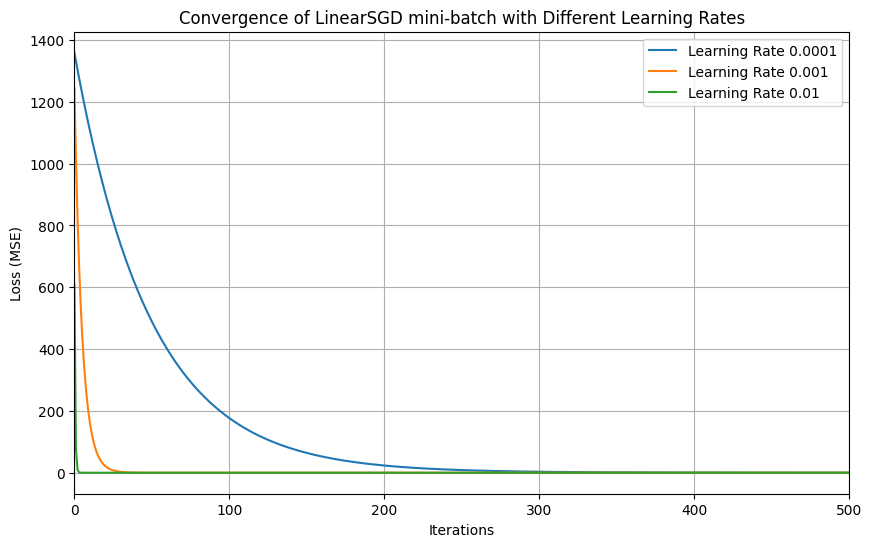

In [ ]:
#QUESTION 5:

# Define three learning rates to test
learning_rates = [0.0001, 0.001, 0.01]

# Store performance results for each learning rate
performance_results = {}


# Test each learning rate
for lr in learning_rates:
    # Initialize the model with the current learning rate
    model = LinearRegressionMiniBatchSGD(LearningRate=lr, iterations=5000, minibatch_size=32)

    # Train the model
    model.fit(x_train, y_train)

    # Predictions on training and test sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate performance using MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store the performance of the learning rate for both
    #the train and the test
    performance_results[lr] = {
        'train_mse': train_mse,
        'test_mse': test_mse
    }

# Display the performance results for each learning rate
for lr, results in performance_results.items():
    print(f"Learning Rate {lr}:")
    print(f"  Train MSE: {results['train_mse']}")
    print(f"  Test MSE: {results['test_mse']}")

    print("-" * 40)

# Optionally, you can visualize how learning rates affect convergence
# Plotting convergence (loss history) for the different learning rates
# Plotting convergence with zoom on the early iterations
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    model = LinearRegressionMiniBatchSGD(LearningRate=lr, iterations=5000, minibatch_size=16)
    model.fit(x_train, y_train)
    plt.plot(model.loss_history, label=f'Learning Rate {lr}')

plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Convergence of LinearSGD mini-batch with Different Learning Rates')
plt.legend()
plt.grid(True)
plt.xlim(0, 500)  # Zoom into the first 500 iterations, to see the trend,
#at first the graph showed conversions but it wasnt easy to visualize and
#pinpoint the differences
plt.show()


In [ ]:
#QUESION 6: (IS DONE ABOVE, in  QUESTION 3



In [ ]:
#EXTRA EXPERIMENT FOR LINEAR STOCHASTIC GRADIENT DESCENT (QUESTION 7)

#What if we add momentum to our gradient descent?
# so include a "velocity" vector that exponentially averages past gradients, and
#compare this without momentum to see the results.

import numpy as np

class LinearRegressionMiniBatchSGDMomentum:

    def __init__(self, LearningRate=0.01, epsilon=1e-7, iterations=1000, minibatch_size=16, momentum=0.9, add_bias=True):
        self.LearningRate = LearningRate
        self.epsilon = epsilon
        self.iterations = iterations
        self.minibatch_size = minibatch_size
        self.momentum = momentum  # Added momentum parameter
        self.add_bias = add_bias
        self.w = None
        self.velocity = None  # Initialize velocity for momentum

        # self.w is the weight vector (shows how much each feature contributes to the final prediction)

    # our (LOSS FUNCTION), from the slides formula
    def mean_square_error(self, actual, predicted):
        n_samples = len(actual)
        mse = (1 / n_samples) * np.sum((actual - predicted) ** 2)
        return mse

    def make_batch(self, x, y, batch_size):
        mini_batches = []
        data_stack = np.hstack((x, y.reshape(-1, 1)))
        # to randomize the batches, use np.random.shuffle, as
        # this would randomly shuffle the data for later use
        np.random.shuffle(data_stack)

        for i in range(0, len(data_stack), batch_size):
            batch = data_stack[i:i + batch_size]
            x_batch = batch[:, :-1]
            y_batch = batch[:, -1]
            mini_batches.append((x_batch, y_batch))
        return mini_batches

    # NEED TO MAKE A GRADIENT FUNCTION
    def compute_gradient(self, x_batch, y_batch, y_pred_batch):
        # Compute the gradient for the mini-batch based on the Mean Squared Error loss function.
        # the @ here is for matrix multiplication. the .T is transpose, these are to help us
        # compute the formula for gradient:
        gradient = -2 * x_batch.T @ (y_batch - y_pred_batch) / x_batch.shape[0]

        return gradient

    def fit(self, features, actual):

        self.loss_history = []

        # Ensure features are in NumPy array form
        features = np.array(features)
        actual = np.array(actual)

        # If features are 1D, reshape them
        if features.ndim == 1:
            features = features[:, None]

        n = features.shape[0]

        # Add bias term if needed
        if self.add_bias:
            features = np.column_stack([features, np.ones(n)])

        # Initialize weights and velocity if not already initialized
        if self.w is None:
            self.w = np.zeros(features.shape[1])
            self.velocity = np.zeros_like(self.w)  # Initialize velocity to zero for momentum

        # Main loop for iterations
        for i in range(self.iterations):
            mini_batches = self.make_batch(features, actual, self.minibatch_size)
            epoch_loss = 0

            for batch in mini_batches:
                # Unpack the batch into x_batch and y_batch
                x_batch, y_batch = batch

                # Ensure x_batch and y_batch are NumPy arrays
                x_batch = np.array(x_batch)
                y_batch = np.array(y_batch)

                # Predict output for the current batch
                y_pred_batch = x_batch @ self.w

                # Calculate the loss for the batch
                loss = self.mean_square_error(y_batch, y_pred_batch)
                epoch_loss += loss

                # Compute the gradient of the loss function (MSE gradient)
                gradient = self.compute_gradient(x_batch, y_batch, y_pred_batch)

                # Update the velocity and weights using the momentum term
                # Momentum update:
                # v(t) = momentum * v(t-1) - LearningRate * gradient
                # w(t+1) = w(t) + v(t)
                self.velocity = self.momentum * self.velocity - self.LearningRate * gradient

                # Update the weights using the velocity
                self.w += self.velocity

            # Append the average loss for the epoch
            self.loss_history.append(epoch_loss / len(mini_batches))

        return self

    def predict(self, features):
        # input features are for which predictions are to be made

        if features.ndim == 1:
            features = features[:, None]

        # determines the number of samples in the input feature matrix
        n_samples = features.shape[0]

        # add bias term if the model includes bias
        if self.add_bias:
            features = np.column_stack([features, np.ones(n_samples)])

        # compute the predictions: y_pred = X * weights
        y_preds = features @ self.w

        return y_preds


In [ ]:
# Initialize the model with momentum
model_with_momentum = LinearRegressionMiniBatchSGDMomentum(LearningRate=0.001, iterations=5000, minibatch_size=32, momentum=0.9)

# Train the model
model_with_momentum.fit(x_train, y_train)

# Make predictions
y_train_pred = model_with_momentum.predict(x_train)
y_test_pred = model_with_momentum.predict(x_test)

# Evaluate performance using MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE mini-batch SGD with Momentum: {train_mse}")
print(f"Test MSE mini-batch SGD with Momentum: {test_mse}")

Training MSE mini-batch SGD with Momentum: 0.06470321294629765
Test MSE mini-batch SGD with Momentum: 0.060987414694503125


Experiments related to logistic regression model:

In [ ]:
x = cdc.data.features.values
y = cdc.data.targets['Diabetes_binary'].values

# Normalize the data
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Helper function to evaluate performance
def evaluate_performance(model, x_train, y_train, x_test, y_test):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Convert predictions to binary (0 or 1)
    y_pred_train_binary = (y_pred_train >= 0.5).astype(int)
    y_pred_test_binary = (y_pred_test >= 0.5).astype(int)

    # Calculate accuracy
    train_accuracy = np.mean(y_pred_train_binary == y_train)
    test_accuracy = np.mean(y_pred_test_binary == y_test)

    return train_accuracy, test_accuracy

In [ ]:
# 1. Test performance of fully batched logistic regression (batch_size=None)
# Split data into training and testing sets (80% training, 20% testing)
split_index = int(0.8 * x.shape[0])
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Fully Batched Logistic Regression:")
model_full_batch = LogisticRegression(learning_rate=0.01, epsilon=1e-4, max_iters=10000, batch_size=None, verbose=True)
model_full_batch.fit(x_train, y_train)
train_acc_full, test_acc_full = evaluate_performance(model_full_batch, x_train, y_train, x_test, y_test)
print(f"Train Accuracy: {train_acc_full * 100:.2f}%")
print(f"Test Accuracy: {test_acc_full * 100:.2f}%")

Fully Batched Logistic Regression:
Terminated after 10000 iterations with gradient norm 0.0011612392798251597.
Train Accuracy: 86.41%
Test Accuracy: 86.24%


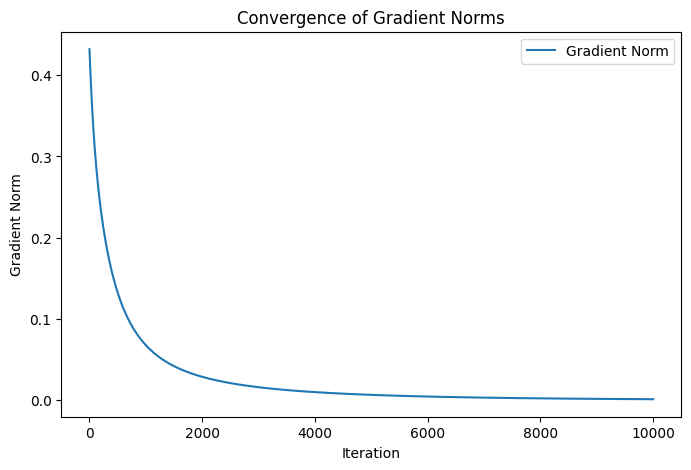

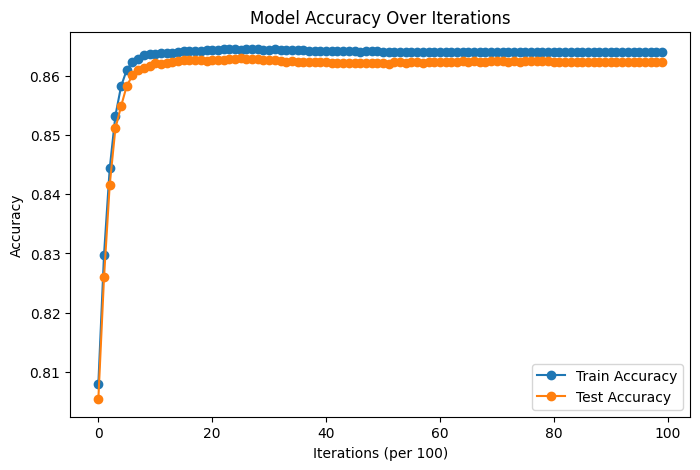

In [ ]:
# Test convergence of the fully-batched logistic regression model (batch_size=None)
model = LogisticRegression(learning_rate=0.01, epsilon=1e-4, max_iters=10000, batch_size=None, verbose=False)

gradient_norms, performance_metrics = model.fit(x_train, y_train)

# Plot gradient norms over iterations
plt.figure(figsize=(8, 5))
plt.plot(gradient_norms, label='Gradient Norm')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Convergence of Gradient Norms')
plt.legend()
plt.show()

# Plot performance over time
train_accs, test_accs = zip(*performance_metrics)
plt.figure(figsize=(8, 5))
plt.plot(train_accs, label="Train Accuracy", marker='o')
plt.plot(test_accs, label="Test Accuracy", marker='o')
plt.xlabel('Iterations (per 100)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Iterations')
plt.legend()
plt.show()


In [ ]:
# 2. Report weights of features
print("\nFeature Weights:")
print(f"Weights: {model_full_batch.w[1:]}")


Feature Weights:
Weights: [ 0.28584028  0.20892506  0.381658   -0.0030684   0.02941714  0.06825374
 -0.02236592 -0.02145062 -0.01461159 -0.17408907  0.01620634  0.00317482
  0.55593879 -0.02585882 -0.05869565  0.04894975  0.12374219  0.35445886
 -0.02681829 -0.10877495 -2.39262256]


Train Accuracy (size 20%): 86.12%
Test Accuracy (size 20%): 86.09%
Train Accuracy (size 40%): 85.99%
Test Accuracy (size 40%): 86.02%
Train Accuracy (size 60%): 85.96%
Test Accuracy (size 60%): 86.04%
Train Accuracy (size 80%): 85.94%
Test Accuracy (size 80%): 86.06%


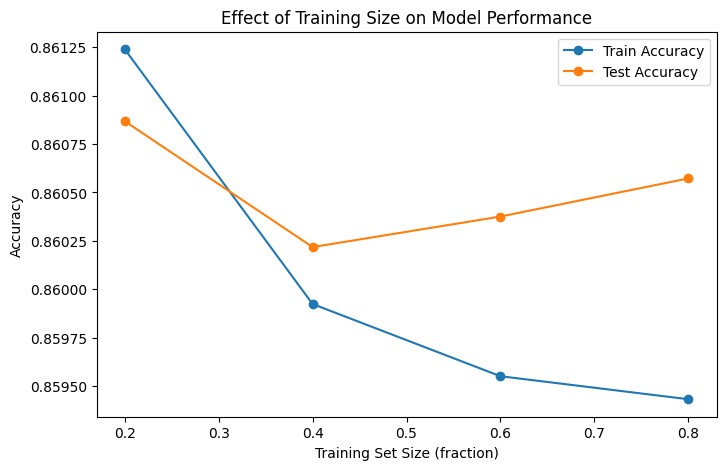

In [ ]:
from sklearn.model_selection import train_test_split

# 3. Sample growing subsets of training data (20%, 40%, 60%, 80%)

x = cdc.data.features.values
y = cdc.data.targets['Diabetes_binary'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

train_sizes = [0.2, 0.4, 0.6, 0.8]
train_accs = []
test_accs = []

for size in train_sizes:
    split_idx = int(size * x_train.shape[0])
    x_sub_train, y_sub_train = x_train[:split_idx], y_train[:split_idx]

    model = LogisticRegression(learning_rate=0.01, epsilon=1e-4, max_iters=10000, batch_size=None)
    model.fit(x_sub_train, y_sub_train)

    train_acc, test_acc = evaluate_performance(model, x_sub_train, y_sub_train, x_test, y_test)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

    # Print the accuracies
    print(f"Train Accuracy (size {size * 100:.0f}%): {train_acc * 100:.2f}%")
    print(f"Test Accuracy (size {size * 100:.0f}%): {test_acc * 100:.2f}%")

# Plot training size performance
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_accs, label="Train Accuracy", marker='o')
plt.plot(train_sizes, test_accs, label="Test Accuracy", marker='o')
plt.xlabel('Training Set Size (fraction)')
plt.ylabel('Accuracy')
plt.title('Effect of Training Size on Model Performance')
plt.legend()
plt.show()



Mini-batch size: 8
Train Accuracy: 85.31%
Test Accuracy: 85.43%

Mini-batch size: 16
Train Accuracy: 86.05%
Test Accuracy: 86.20%

Mini-batch size: 32
Train Accuracy: 86.04%
Test Accuracy: 86.22%

Mini-batch size: 64
Train Accuracy: 86.11%
Test Accuracy: 86.25%

Mini-batch size: 128
Train Accuracy: 86.02%
Test Accuracy: 86.17%


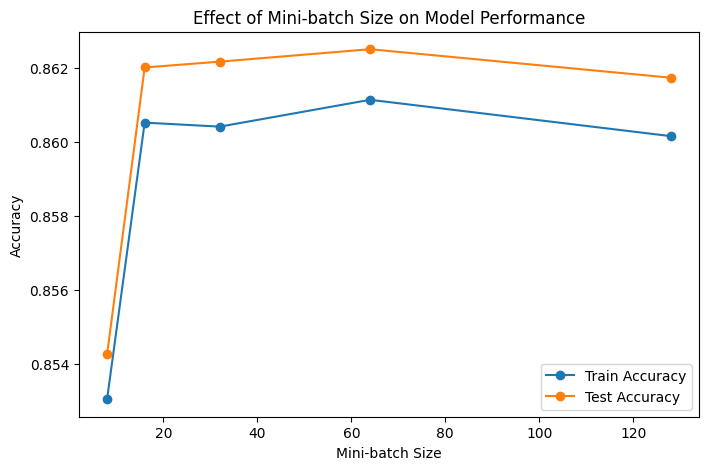

In [ ]:
# 4. Varying mini-batch sizes
batch_sizes = [8, 16, 32, 64, 128]
batch_train_accs = []
batch_test_accs = []
batch_iters = []

for bsize in batch_sizes:
    print(f"\nMini-batch size: {bsize}")
    model_batch = LogisticRegression(learning_rate=0.01, epsilon=1e-4, max_iters=10000, batch_size=bsize)
    model_batch.fit(x_train, y_train)
    train_acc, test_acc = evaluate_performance(model_batch, x_train, y_train, x_test, y_test)

    batch_train_accs.append(train_acc)
    batch_test_accs.append(test_acc)
    print(f"Train Accuracy: {train_acc * 100:.2f}%")
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot batch size performance
plt.figure(figsize=(8, 5))
plt.plot(batch_sizes, batch_train_accs, label="Train Accuracy", marker='o')
plt.plot(batch_sizes, batch_test_accs, label="Test Accuracy", marker='o')
plt.xlabel('Mini-batch Size')
plt.ylabel('Accuracy')
plt.title('Effect of Mini-batch Size on Model Performance')
plt.legend()
plt.show()



Learning rate: 0.001
Train Accuracy: 85.87%
Test Accuracy: 85.98%

Learning rate: 0.01
Train Accuracy: 85.98%
Test Accuracy: 86.06%

Learning rate: 0.1
Train Accuracy: 86.03%
Test Accuracy: 86.21%


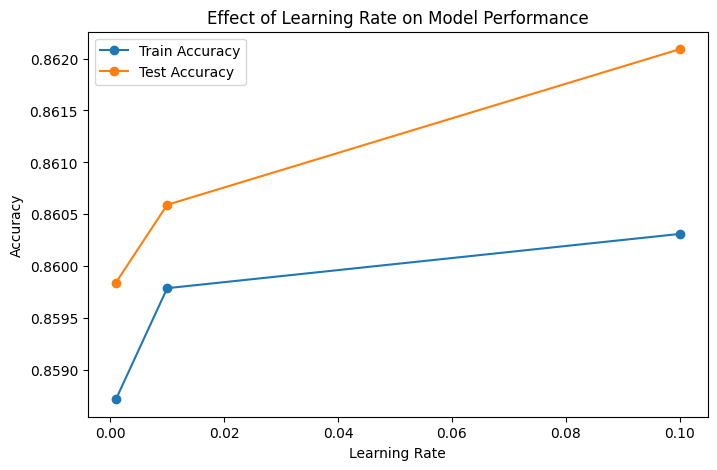

In [ ]:
# 5. Test different learning rates
learning_rates = [0.001, 0.01, 0.1]
lr_train_accs = []
lr_test_accs = []

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    model_lr = LogisticRegression(learning_rate=lr, epsilon=1e-4, max_iters=10000, batch_size=None)
    model_lr.fit(x_train, y_train)
    train_acc, test_acc = evaluate_performance(model_lr, x_train, y_train, x_test, y_test)

    lr_train_accs.append(train_acc)
    lr_test_accs.append(test_acc)
    print(f"Train Accuracy: {train_acc * 100:.2f}%")
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot learning rate performance
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, lr_train_accs, label="Train Accuracy", marker='o')
plt.plot(learning_rates, lr_test_accs, label="Test Accuracy", marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Model Performance')
plt.legend()
plt.show()